# Анализ данных медцентра

# Задача

🔸 Провести анализ изменения цены лечения в медицинской клинике в 2022 году относительно 2021 года

# Содержанте
1. Предобработка данных

2. Подготовка к анализу данных

3. Анализ данных:

-анализ изменения цены конкретных услуг;
-анализ изменения цены по возрасту;
-анализ изменения цены по гендерному фактору;
-анализ изменения стоимости лечения конкретного пользователя в год;
-анализ разницы в стоимости услуг в год.

Выводы:
1. В категории "исследования" особой разницы в цене услуг не наблюдается. В категории "массаж и процедуры" имеется рост цен начиная с мая 2021 года, заканчивая апрелем 2022 года. В это время часто делались дорогие процедуры "сеанс_sis_терапии_длинный_цикл" и "втэс_внутритканевая_электростимуляция". С января по март 2022 года услуга 'сеанс_sis_терапии_длинный_цикл1зона' имела более высокую цену. 'втэс_внутритканевая_электростимуляция1сеанс_на_любую_область' делал один человек один раз. Что касается операций, то в категории "высокая" цена имеются неоднороднати по месяцам. Топ 3 самых дорогих операций: тотальная_внутривенная_анестезия делалась в июне 2021 года. хирургическое_удаление_доброкачественной_опухоли_кожи делалась в августе и марте 2022 года и в марте 2021 года, стоимость данной операции повышалась дважды в 2021 и 2022 годах;  вскрытие_панариция делалась в августе и апреле 2022 и в апреле 2021. У "приема специалиста" интересная картина, "дорогих" приемов в 2021 году было больше чем в 2022 году. В 2021 году очевидное влияние на структуру приемов специалистов произвели отголоски КОВИД-19. Первое место по стоимости заняли "приемы врачей на дому". В 2022 году же на первое место по стоимости вышли "приемы_врача_эндокринолога__руководителя_направления". В категории "прочее" все стабильно кроме апреля 2021 года, когда появляется дорогостоящая позиция - подбор_срар_терапии.
2. Во всех возрастных категориях видно то, что стоимость дорогого лечения в 2021 году выше чем в 2022 году. В 2021 году страна начала выход из ограничений по ковид, возможно люди начали проводить плановые операции и обследования, плюс в 2022 началась СВО и экономическая ситуация у людей ухудшилась.
3. Координально большой разницы между полами в тратах на лечение нет. Видно не большое повышение в стоимости лечения мужчин начиная с 3 месяца 2022 года, видно из-за СВО. Если смотреть суммарный прайс, то видно что и мужчины и женщины потратили в 2022 больше средств чем в 2021.
4. Выручка растет с начала 2022 года по апрель 2022 года за счет увеличения за счет увеличения количества процедур. Потом идет снижение как выручки так и количества процедур, видно "старые" пользователи вылечились, а новые не пришли. Прирост платы за лечение по годам по пользователям не равномерный и всреднем составляет 2,4. По месяцам прирост выручки также падает. В январе и феврале был рост выручки более чем в два раза, далее произошло снежение выручки в 2022 году по отношению к 2021 году.
5. Рост в 2022 показали все категории услуг кроме группы "прочее". Наибольший рост был в категории "прием специалиста".

In [87]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import json
import re
from datetime import datetime

In [88]:
# Загрузка датафрейма

df = pd.read_excel("C:\\Users\\Sergey\\data_test_task_2022.xlsx")

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85369 entries, 0 to 85368
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   record_id             85369 non-null  int64  
 1   service_date          85369 non-null  object 
 2   service_name          85369 non-null  object 
 3   service_amount        85369 non-null  int64  
 4   service_number        85369 non-null  int64  
 5   insured               85369 non-null  int64  
 6   sex_id                85348 non-null  float64
 7   age_for_service_date  85369 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 5.2+ MB


В датафрейме содержатся следующие данные:
    record_id - уникальный идентификатор строки данных;
    service_date - дата оказания медицинской услуги;
    service_name - наименование медицинской услуги;
    service_number - количество услуг;
    service_amount - сумма выплат (стоимость оказанных услуг в рублях);
    insured - уникальный идентификатор пациента;
    sex_id - пол пациента;
    age_for_service_date - возраст пациента.
В дальнейшем добавлены поля price, price_group, age_group.

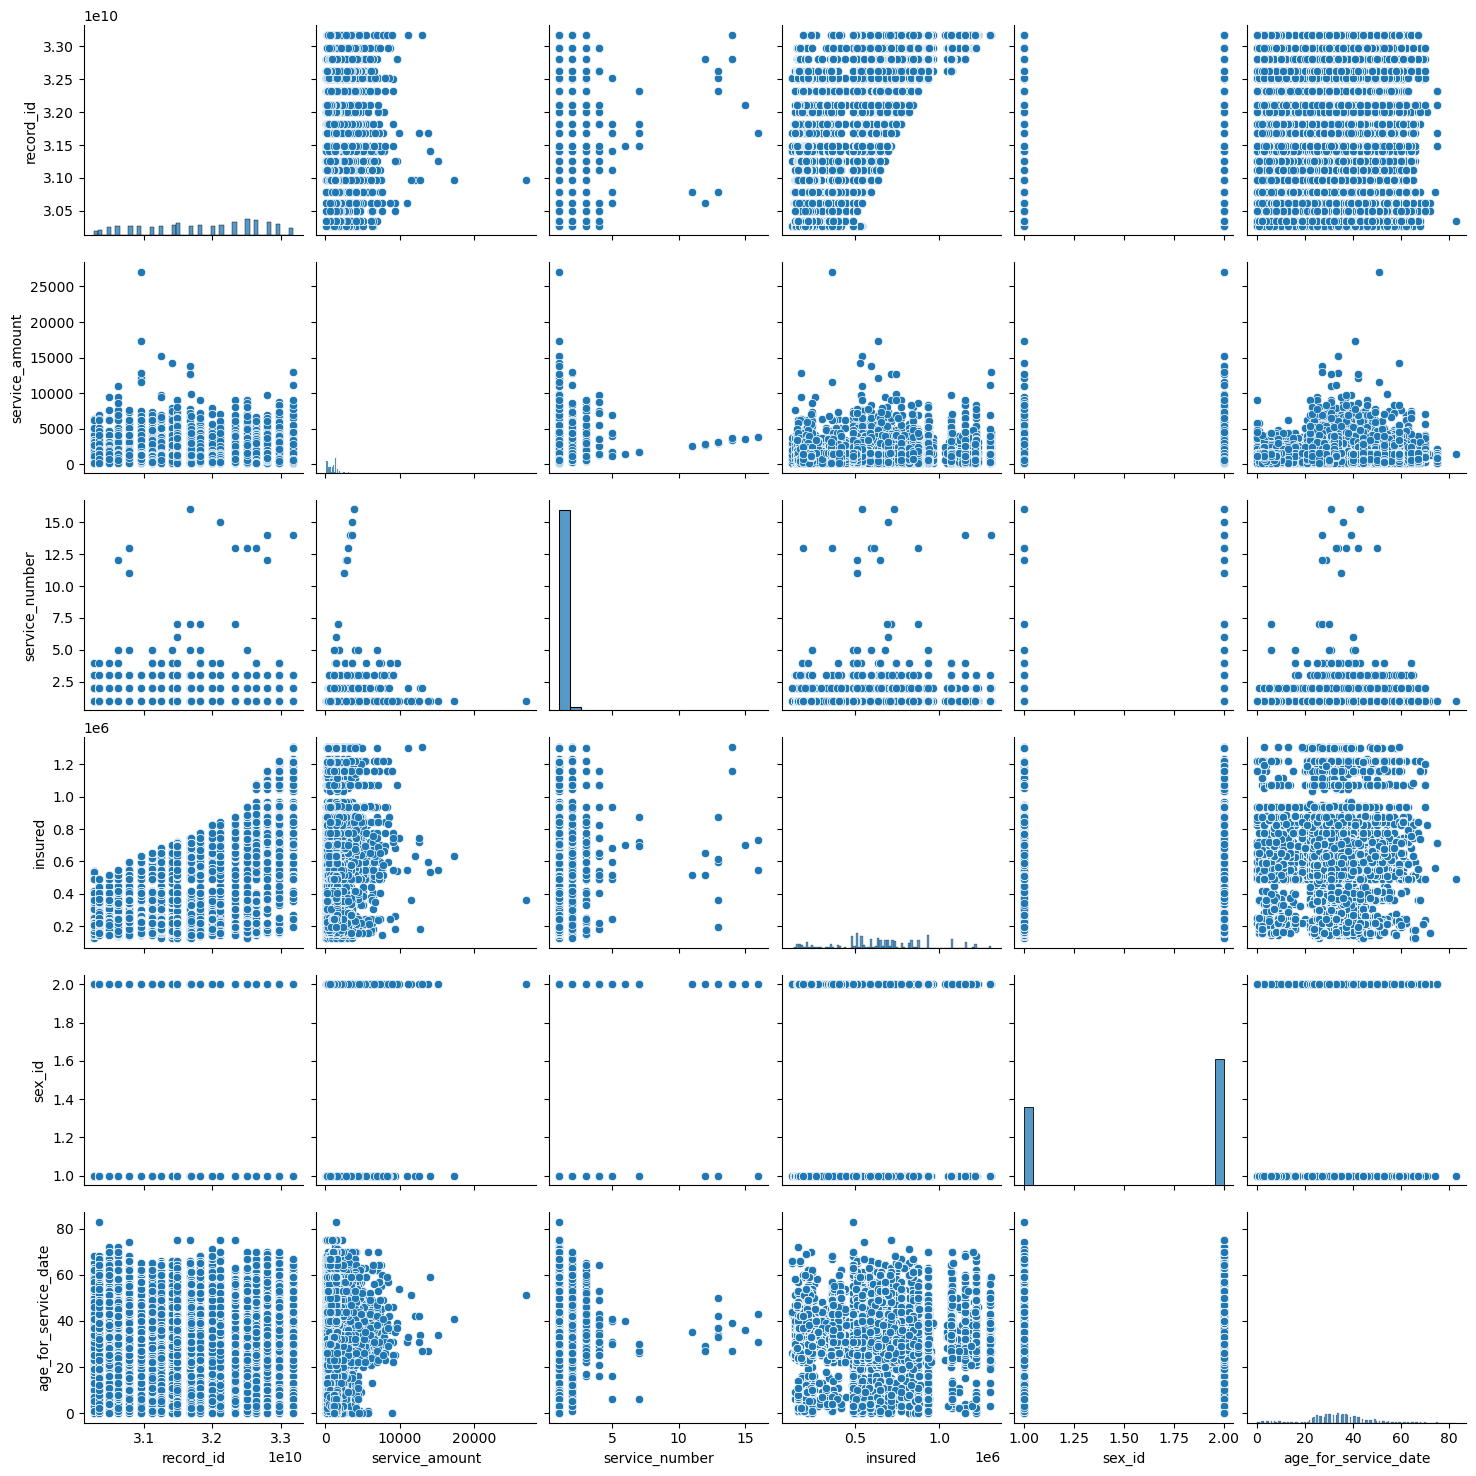

In [90]:
sns.pairplot(df);

есть выбросы, но о них позже

# Предобработка данных

Посмотрим наличие 0 в данных

In [91]:
df['sex_id'].unique()

array([ 2.,  1., nan])

Нулей не так много, думаю их можно удалить.

In [92]:
df=df.dropna()

In [93]:
df['sex_id'] = df['sex_id'].astype(str)
df['sex_id'] = df['sex_id'].str.lower()
mapping = {'1.0': 'man', '2.0': 'woman'}
df['sex_id'] = df['sex_id'].replace(mapping)
df['sex_id'].unique()

array(['woman', 'man'], dtype=object)

Ищем дубли 

In [94]:
df['service_name'].unique()

array(['Прием первичный',
       'Взятие материала на посев, цитологическое исследование ( риноцитограмма)',
       'Посев отдел, дыхательных путей - слизистая зева с определением чувствительности к антибиотикам',
       'Общий анализ крови (лейкоцитарная форм,, СОЭ)',
       'Ревматоидный фактор', 'С-реактивный белок',
       'Взятие крови из периферической вены', 'Магнитотерапия (1 сеанс)',
       'УВЧ-терапия (1 сеанс) (1 поле)', 'Прием повторный',
       'Смазывание глотки лекарственными формами', 'Взятие мазка',
       'Обработка вульвы', 'Обработка шейки матки',
       'Гинекологический мазок', 'Общий анализ мочи', 'Креатинин',
       'Мочевая кислота', 'Мочевина', 'Общий белок',
       'Ультразвуковое исследование почек и надпочечников',
       'Ультразвуковое исследование мочевого пузыря',
       'ЛПНП (липопротеиды низкой плотности, бета-липопротеиды)',
       'Триглицериды', 'Холестерин', 'АЛТ (аланинаминотрансфераза)',
       'Альдостерон', 'Кортизол (кровь)', 'Ренин + Ангио

In [95]:
df['service_name'] = df['service_name'].str.lower()
df['service_name'] = df['service_name'].replace(',', ' ', regex=True)
df['service_name'] = df['service_name'].replace(' ', '_', regex=True)
df.service_name = df.service_name.apply(lambda x: re.sub(r'[,"()\']', '', x))
df['service_name'] = df['service_name'].replace('хирургическое_удаление_доброкачественной_опухоли_кожи', 'хирургическое_удаление_доброкачественной_опухоли_кожи', regex=True)


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85348 entries, 0 to 85368
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   record_id             85348 non-null  int64 
 1   service_date          85348 non-null  object
 2   service_name          85348 non-null  object
 3   service_amount        85348 non-null  int64 
 4   service_number        85348 non-null  int64 
 5   insured               85348 non-null  int64 
 6   sex_id                85348 non-null  object
 7   age_for_service_date  85348 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 5.9+ MB


In [97]:
df['service_name'] = df['service_name'].str.replace('прием_врача_эндокринолога__руководителя_направления_блох_с_п','прием_врача_эндокринолога__руководителя_направления')


In [98]:
df['service_name'].unique()

array(['прием_первичный',
       'взятие_материала_на_посев__цитологическое_исследование__риноцитограмма',
       'посев_отдел__дыхательных_путей_-_слизистая_зева_с_определением_чувствительности_к_антибиотикам',
       'общий_анализ_крови_лейкоцитарная_форм___соэ',
       'ревматоидный_фактор', 'с-реактивный_белок',
       'взятие_крови_из_периферической_вены', 'магнитотерапия_1_сеанс',
       'увч-терапия_1_сеанс_1_поле', 'прием_повторный',
       'смазывание_глотки_лекарственными_формами', 'взятие_мазка',
       'обработка_вульвы', 'обработка_шейки_матки',
       'гинекологический_мазок', 'общий_анализ_мочи', 'креатинин',
       'мочевая_кислота', 'мочевина', 'общий_белок',
       'ультразвуковое_исследование_почек_и_надпочечников',
       'ультразвуковое_исследование_мочевого_пузыря',
       'лпнп_липопротеиды_низкой_плотности__бета-липопротеиды',
       'триглицериды', 'холестерин', 'алт_аланинаминотрансфераза',
       'альдостерон', 'кортизол_кровь', 'ренин_+_ангиотензин_1', 'т4_с

Наврятли чтобы один и тотже пациент делал одни и теже услуги в один день.

In [99]:
print(df.shape[0])
print(df.duplicated(subset=['insured', 'service_name', 'service_date', 'service_amount', 'sex_id']).sum())

print(df[df.duplicated(subset=['insured', 'service_name', 'service_date', 'service_amount', 'sex_id'], keep=False)]
      [['insured', 'service_name', 'service_date', 'service_amount', 'sex_id']])
df = df.drop_duplicates(subset=['insured', 'service_name', 'service_date', 'service_amount', 'sex_id'], keep='first')
display(df.shape[0])

85348
1348
       insured                                       service_name  \
49      418179                                    прием_первичный   
90      402409                                    прием_повторный   
93      402409                                    прием_повторный   
104     418179                                    прием_первичный   
142     166120                                    прием_повторный   
...        ...                                                ...   
81340   629910                взятие_крови_из_периферической_вены   
83240  1302956           исследование_отделяемого_молочной_железы   
83241  1302956           исследование_отделяемого_молочной_железы   
85246  1302824  в_мышечная_инъекция_за_1_процедуру_без_стоимос...   
85247  1302824  в_мышечная_инъекция_за_1_процедуру_без_стоимос...   

      service_date  service_amount sex_id  
49      2021-01-05            1470    man  
90      2021-01-05            1313  woman  
93      2021-01-05          

84000

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84000 entries, 0 to 85368
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   record_id             84000 non-null  int64 
 1   service_date          84000 non-null  object
 2   service_name          84000 non-null  object
 3   service_amount        84000 non-null  int64 
 4   service_number        84000 non-null  int64 
 5   insured               84000 non-null  int64 
 6   sex_id                84000 non-null  object
 7   age_for_service_date  84000 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 5.8+ MB


In [101]:
df['sex_id'].unique()

array(['woman', 'man'], dtype=object)

# Изучим выбросы

<Figure size 10000x800 with 0 Axes>

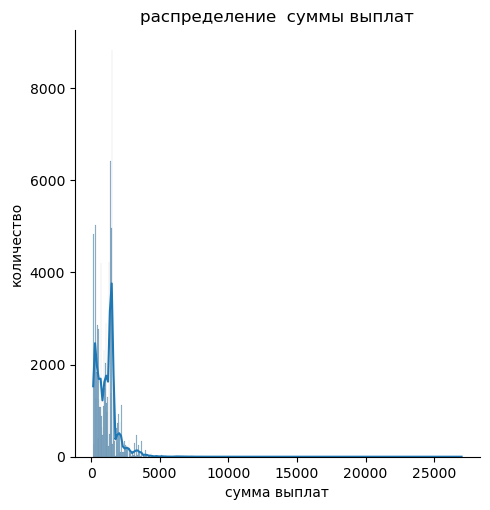

In [102]:

plt.figure(figsize=(100, 8))
sns.displot (df['service_amount'], kde= True )
plt.title("распределение  суммы выплат")
plt.xlabel("сумма выплат")
plt.ylabel("количество")
plt.show()

<Figure size 10000x800 with 0 Axes>

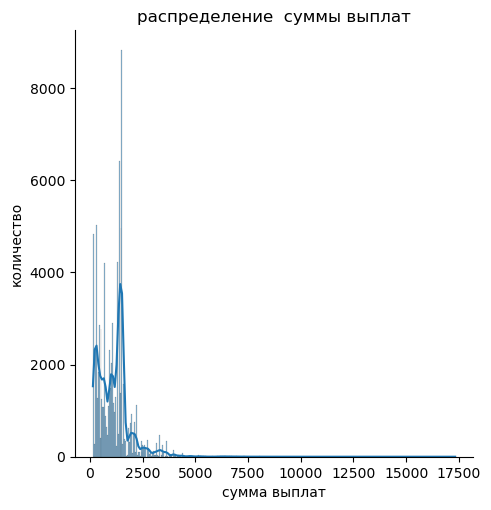

In [103]:
df = df.loc[df['service_amount']<20000]
plt.figure(figsize=(100, 8))
sns.displot (df['service_amount'], kde= True )
plt.title("распределение  суммы выплат")
plt.xlabel("сумма выплат")
plt.ylabel("количество")
plt.show()

Как видно есть единичные значения от 8000 и выше. Обрежем на 20000

<Figure size 10000x800 with 0 Axes>

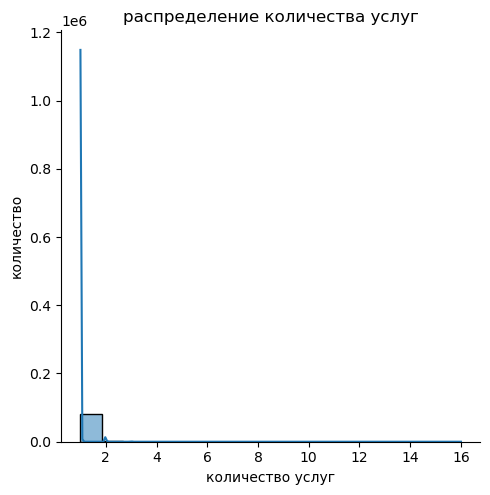

In [104]:
plt.figure(figsize=(100, 8))
sns.displot (df['service_number'], kde= True )
plt.title("распределение количества услуг")
plt.xlabel("количество услуг")
plt.ylabel("количество")
plt.show()

In [105]:
df['service_date'].unique()

array(['2021-01-24', '2021-01-26', '2021-01-27', '2021-01-15',
       '2021-01-17', '2021-01-31', '2021-01-05', '2021-01-28',
       '2021-01-03', '2021-01-04', '2021-01-06', '2021-01-07',
       '2021-01-08', '2021-01-12', '2021-01-13', '2021-01-14',
       '2021-01-16', '2021-01-19', '2021-01-21', '2021-01-29',
       '2021-01-30', '2021-01-09', '2021-01-20', '2021-01-25',
       '2021-01-23', '2021-01-22', '2021-01-10', '2021-01-11',
       '2021-01-18', '2021-02-05', '2021-02-22', '2021-02-02',
       '2021-02-04', '2021-02-16', '2021-02-09', '2021-02-10',
       '2021-02-11', '2021-02-12', '2021-02-25', '2021-02-17',
       '2021-02-06', '2021-02-08', '2021-02-13', '2021-02-19',
       '2021-02-20', '2021-02-23', '2021-02-27', '2021-02-15',
       '2021-02-03', '2021-02-26', '2021-02-28', '2021-02-24',
       '2021-02-01', '2021-02-21', '2021-02-07', '2021-02-14',
       '2021-02-18', '2021-03-24', '2021-03-17', '2021-03-26',
       '2021-03-29', '2021-03-19', '2021-03-10', '2021-

22 год заканчивается 8 месяцем, нужно 21 год тоже ограничить

In [106]:
df1=df.loc[df['service_number']>6]
df1


,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
9050,30620900003,2021-04-03,постановка_кожных_аллергопроб_за_1_единицу,2772,12,512453,man,29
12519,30786052903,2021-05-01,постановка_кожных_аллергопроб_за_1_единицу,2541,11,512572,woman,35
12618,30786062803,2021-05-15,постановка_кожных_аллергопроб_за_1_единицу,3003,13,363075,woman,34
14404,30786241403,2021-05-15,постановка_кожных_аллергопроб_за_1_единицу,3003,13,596505,man,33
31349,31485597303,2021-10-26,постановка_кожных_аллергопроб_за_1_единицу,1680,7,716050,woman,26
36313,31680597403,2021-11-20,постановка_кожных_аллергопроб_за_1_единицу,3840,16,544906,man,31
36853,31680651703,2021-11-02,постановка_кожных_аллергопроб_за_1_единицу,1680,7,716108,man,27
37567,31680727103,2021-11-25,постановка_кожных_аллергопроб_за_1_единицу,3840,16,734530,woman,43
43755,31814239903,2021-12-10,постановка_кожных_аллергопроб_за_1_единицу,1680,7,693347,woman,30
48871,32112436003,2022-02-05,постановка_кожных_аллергопроб_за_1_единицу,3600,15,698543,woman,36


Как видно множественность в данных по колличеству услуг дает процедура "постановка_кожных_аллергопроб". Суть метода постановки кожных аллергопроб состоит в следующем. Пациенту на кожу внутренней поверхности предплечья наносят определенные аллергены. Нанесение аллергенов выполняют либо при помощи внутрикожных инъекций, либо делают небольшие царапины и капают на них растворы аллергенов. Думаю трогать эти данные не буду.

<Figure size 10000x800 with 0 Axes>

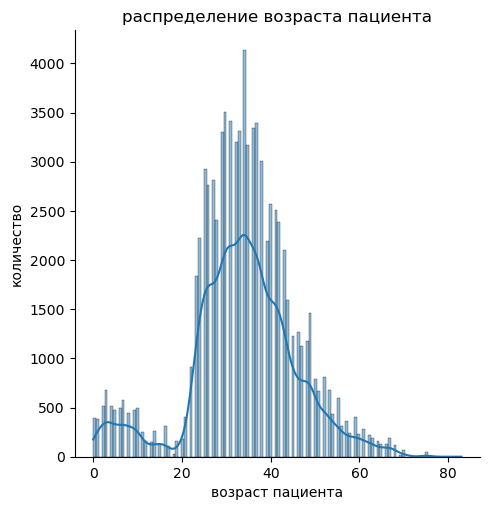

In [107]:
plt.figure(figsize=(100, 8))
sns.displot (df['age_for_service_date'], kde= True );
plt.title("распределение возраста пациента")
plt.xlabel("возраст пациента")
plt.ylabel("количество")
plt.show()

В распределении возраста видимых проблем нет.

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83999 entries, 0 to 85368
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   record_id             83999 non-null  int64 
 1   service_date          83999 non-null  object
 2   service_name          83999 non-null  object
 3   service_amount        83999 non-null  int64 
 4   service_number        83999 non-null  int64 
 5   insured               83999 non-null  int64 
 6   sex_id                83999 non-null  object
 7   age_for_service_date  83999 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 5.8+ MB


In [109]:
#df['service_name'].describe()

# Подготовка к анализу данных

Для анализа данных нам нужен столбец с годом  и месяцем.

In [110]:
df['year']=pd.DatetimeIndex(df['service_date']).year
df['year'].astype('int')
display(df['year'])

0        2021
1        2021
2        2021
3        2021
4        2021
         ... 
85364    2022
85365    2022
85366    2022
85367    2022
85368    2022
Name: year, Length: 83999, dtype: int64

In [111]:
df['month']=pd.DatetimeIndex(df['service_date']).month
df['month'].astype('int')
display(df['month'])

0        1
1        1
2        1
3        1
4        1
        ..
85364    8
85365    8
85366    8
85367    8
85368    8
Name: month, Length: 83999, dtype: int64

Добавим столбец с прайсом за одну услугу

In [112]:
df['price']=df['service_amount']/df['service_number']
df['price'].head(10)

0    1470.0
1     284.0
2    1134.0
3     693.0
4     420.0
5     420.0
6     158.0
7    1470.0
8    1040.0
9    1040.0
Name: price, dtype: float64

Т.к. данных много, то их нужно как-то категоризовать. Разберемся со стоимостью услуг.

In [113]:
df['price'].describe()

count    83999.000000
mean      1144.613972
std        774.261777
min        147.000000
25%        540.000000
50%       1120.000000
75%       1530.000000
max      17325.000000
Name: price, dtype: float64

In [114]:
def price_group(price):
    if price <= 540: return 'низкая'
    elif price > 540 and price <= 1530: return 'средняя'
    elif price>1530: return 'высокая'
df['price_group']=df['price'].apply(price_group)  
print(df['price_group'])

0        средняя
1         низкая
2        средняя
3        средняя
4         низкая
          ...   
85364     низкая
85365    средняя
85366     низкая
85367     низкая
85368    средняя
Name: price_group, Length: 83999, dtype: object


Разберемся с возрастом

In [115]:
def age_group(age_for_service_date):
    if age_for_service_date <= 7: return 'ребенок до 7 лет'
    elif age_for_service_date > 7 and age_for_service_date <= 18: return 'подросток 7-18 лет'
    elif age_for_service_date > 18 and age_for_service_date <= 45: return 'средний 18-45 лет'
    elif age_for_service_date > 45 and age_for_service_date <= 60: return 'предпенсионный 45-60 лет'
    elif age_for_service_date>60: return 'пенсионер 60 и более'
df['age_group']=df['age_for_service_date'].apply(age_group)  
df.groupby('age_group')['price'].count()

age_group
пенсионер 60 и более         1563
подросток 7-18 лет           2821
предпенсионный 45-60 лет    10590
ребенок до 7 лет             4037
средний 18-45 лет           64988
Name: price, dtype: int64

In [116]:
ter=['терапевта', 'прием_повторный', 'прием_первичный', 'прием', 'осмотр', 'консультация', 'расшифровка']

oper=['обработка', 'смазывание_глотки_лекарственными_формами', 'удаление', 'перевязка', 'наложение',
     'анемизация_слизистой_носа', 'промывание_носа_методом_перемещения', 'снятие_швов', 'анестезия',
      'инстиляция_мочевого_пузыря', 'катетеризация_мочевого_пузыря','инстилляция_лекарственных_веществ_в_конъюнктивную_полость',
     'установка', 'промывание', 'блокада', 'введение', 'вскрытие', 'постановка_компресса_эндоурально',
      'туалет', 'накожное_применение_лекарственных_препаратов', 'инъекция', 'санация', 
      'прижигание_(туширование)_при_лор_патологии',  'продувание_слуховых_труб_по_политцеру', 'снятие_полимерной_повязки',
      'биопсия', 'аппликация', 'иммобилизация', 'снятие_гипсовой_повязки', 
      'вливание', 'криодеструкция', 'тампонада', 'коагуляция', 'туширование_лимфоидной_ткани', 
      'проведение_хирургической_манипуляции_2_степени_сложности', 'снятие_циркулярной_гипсовой_повязки',
       'коррекция_полимерной/гипсовой_повязки', 'шинирование_при_переломе_костей']

res=['исследование', 'анализ', 'взятие', 'измерение', 'посев', 'терапия', 'с-реактивный_белок', 'гинекологическиймазок',
    'креатинин', 'мочевая_кислота', 'мочевина', 'общий_белок', 'лпнп',
     'триглицериды', 'холестерин', 'алт', 'альдостерон', 'кортизол_(кровь)', 'ренин_+_ангиотензин_1',
     'т4', 'ттг', 'аст_(аспартатаминотрансфераза)', 'билирубин_общий', 'билирубин_прямой', 
     'дуплексное_сканирование_почечных_сосудов', 'т3', 'рентгенография', 'мазок', 'фсг', 'магний', 'pneumoniae', 'глюкоза',
     'экг', 'covid-19', 'ферритин','тест_ширмера', 'кольпоскопия', 'витамин', 'гормон', 'вакцинация', 'формула',
    'группа_крови', 'rh-фактор', 'rubella_igg', 'rubella_igm', 'toxoplasma_gondii_igg', 'toxoplasma_gondii_igм',
       'гепатит_в_hbsag', 'гепатит_с_anti-hcv_общие', 'экспресс_-_метод_определения_кампилобактера_в_биоптате_слизистой', 
     'ограмма', 'пункция', 'вич', 'соскоб', 'мрт', 'сканирование', 'железо', 'тпо', 'ревматоидный_фактор', 'скопия', 'epstein',
     'igm', 'igg', 'диагностика', 'рефрактометрия', 'инсулин', 'пса', 'пролактин', 'альфа-амилаза',
     'ггт', 'фосфотаза', 'гемоглобин', 'пульсоксиметрия', 'функция_внешнего_дыхания', 'спирография', 'трансферрин',
     'helicobacter', 'фолиевая_кислота', 'лпвп', 'кальций_ионизированный',
     'кальций_общий', 'глюкозотолерантный_тест', 'соэ', 'калий/натрий/хлор', 'ige', 'тимпанометрия', 'углеводы',
     'эндоскопическая_визуализация', 'проведение_пробы_манту', 'ээг',
    'проведение_комплекса_специфических_вестибулярных_тестов',' антитела', 'урофлуометрия',
    'фосфор', 'проба', 'ачтв', 'протромбин', 'калий', 'натрий', 'периметрия', 'тредмил-тест',
     'дыхательный_уреазный_тест_на_нр_(_хеликобактер_пилори)', 'антитела', 'антиген', 'не4', 'тестостерон',
     'тромбиновое_время', 'фибриноген', 'билирубин', 'узи', 'микроальбумин', 'мскт', 'кальцитонин', 'ат_к_тг', 'асло',
    'альбумин', 'антитромбин', 'bordetella_pertussis', 'эхоэнцефалография', 'эстрадиол', 
     'hsv_1/2_(вирус_простого_герпеса_1/2)_(кровь)', 'cmv_(цитомегаловирус)_(кровь)', 'катионный_протеин_эозинофиллов',
     'эпителий_кошки', 'эпителий_собаки', 'плесень_aspergillus_f', 'плесень_alternaria_alternata', 'плесень_cladosporium_her',
        'клещ_домашней_пыли', 'iga', 'соксоб', 'герпеса', 'липаза', 'хлор',
    'cmv', 'ebv', 'кал','тиреоглобулин', 'пыльца', 'эпителий', 'ретикулоциты', 'келл', 'ат', 'лдг', 'хгч', 'аудиометрия',
    'кортизол', 'д-димер', 'ночное_респираторное_мониторирование', 'белковые_фракции', 'креатинкиназа_-_мв',
     'постановка_кожных_аллергопроб', 'прогестерон', 'скрининг', 'обнаружение_энтеровируса', 'обнаружение_энтеровируса',
     'кортизол', 'плесень', 'проведение_диаскинтеста', 'тромбоцитов', 'проведение_экспресс-теста_на_определение_рн_влагалища',
     'аполипопротеин_а1', 'доплерометрия', 'ктг', 'диагностическая_аспирация_сустава',
     'цинк', 'перо_попугая', 'таракан','с-пептид', 'ультразвуковое_иследование', 'рфмк', 'серотонин', 'гомоцистеин', 'днк_впч',
    'флороценоз', 'экспресс-тест', 'андростендион', 'холинэстераза', 'зондирование',
     'сифилис', 'са-72-4', 'эластотонометрия', 'ренин']

mas=['массаж', 'токи', 'фонофорез', 'рефлексотерапии', 'форез', 'в/в_капельная_инфузия', 'сеанс', 'лфк', 'электромиостимуляция',
    'вестибулярные_маневры', 'электронейромиография']

def name_group(service_name):
    if any(word in service_name for word in ter):
        return 'прием специалиста'
    elif any(word in service_name for word in oper):
        return 'Операции'
    elif any(word in service_name for word in res):
        return 'Исследование'
    elif any(word in service_name for word in mas):
        return 'Массаж и процедуры'
    else:
        return 'прочее'

df['name_group'] = df['service_name'].apply(name_group)
#df=df.loc[df['name_group']=='прочее']
#df['service_name'].unique()

In [117]:
df.head()

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,year,month,price,price_group,age_group,name_group
0,30268157003,2021-01-24,прием_первичный,1470,1,490777,woman,26,2021,1,1470.0,средняя,средний 18-45 лет,прием специалиста
1,30268157103,2021-01-24,взятие_материала_на_посев__цитологическое_иссл...,284,1,490777,woman,26,2021,1,284.0,низкая,средний 18-45 лет,Исследование
2,30268157203,2021-01-24,посев_отдел__дыхательных_путей_-_слизистая_зев...,1134,1,490777,woman,26,2021,1,1134.0,средняя,средний 18-45 лет,Исследование
3,30268157303,2021-01-24,общий_анализ_крови_лейкоцитарная_форм___соэ,693,1,490777,woman,26,2021,1,693.0,средняя,средний 18-45 лет,Исследование
4,30268157403,2021-01-24,ревматоидный_фактор,420,1,490777,woman,26,2021,1,420.0,низкая,средний 18-45 лет,Исследование


Обрежем месяцы

In [118]:
df = df[df['month'] < 9]

# Анализ данных

Провести анализ изменения цены лечения в медицинской клинике в 2022 году относительно 2021 года.
Декомпозируем задачу:
1. анализ изменения цены конкретных услуг;
2. анализ изменения цены по возрасту;
3. анализ изменения цены по гендерному фактору;
4. анализ изменения стоимости лечения конкретного пользователя в год;
5. анализ разницы в стоимости услуг в год.

# Анализ изменения цены конкретных услуг

In [120]:
# Средний прайс по группам
pivot = df.pivot_table(index=['name_group', 'year'], values=['price'], aggfunc='mean')
display(pivot)

price
name_group         year             
Исследование       2021   919.825710
                   2022   997.697464
Массаж и процедуры 2021  1276.932153
                   2022  1247.328072
Операции           2021   917.000785
                   2022  1031.006623
прием специалиста  2021  1427.367982
                   2022  1524.280338
прочее             2021   420.701754
                   2022   430.416667

In [121]:
chain_object_types = df.groupby(['name_group', 'price_group', 'year', 'month'], as_index=False).agg({'price':'mean'}).sort_values(by='price', ascending=False)
chain_object_types_top=chain_object_types
chain_object_types_top

,name_group,price_group,year,month,price
106,Операции,высокая,2022,7,4188.800000
102,Операции,высокая,2022,3,3936.190476
92,Операции,высокая,2021,1,3727.500000
107,Операции,высокая,2022,8,3631.428571
99,Операции,высокая,2021,8,3422.285714
...,...,...,...,...,...
29,Исследование,низкая,2022,6,299.672856
28,Исследование,низкая,2022,5,299.127466
24,Исследование,низкая,2022,1,297.920354
25,Исследование,низкая,2022,2,297.823194


In [123]:
# посмотрим средний прайс
pivot = df.pivot_table(index=['name_group', 'year', 'month', 'price_group'], values=['price'], aggfunc='mean')
display(pivot)

price
name_group   year month price_group             
Исследование 2021 1     высокая      2364.948454
                        низкая        333.397059
                        средняя       892.218593
                  2     высокая      2448.492386
                        низкая        314.503861
...                                          ...
прочее       2022 6     низкая        414.444444
                  7     низкая        440.000000
                        средняя       580.000000
                  8     низкая        440.000000
                        средняя       580.000000

[191 rows x 1 columns]

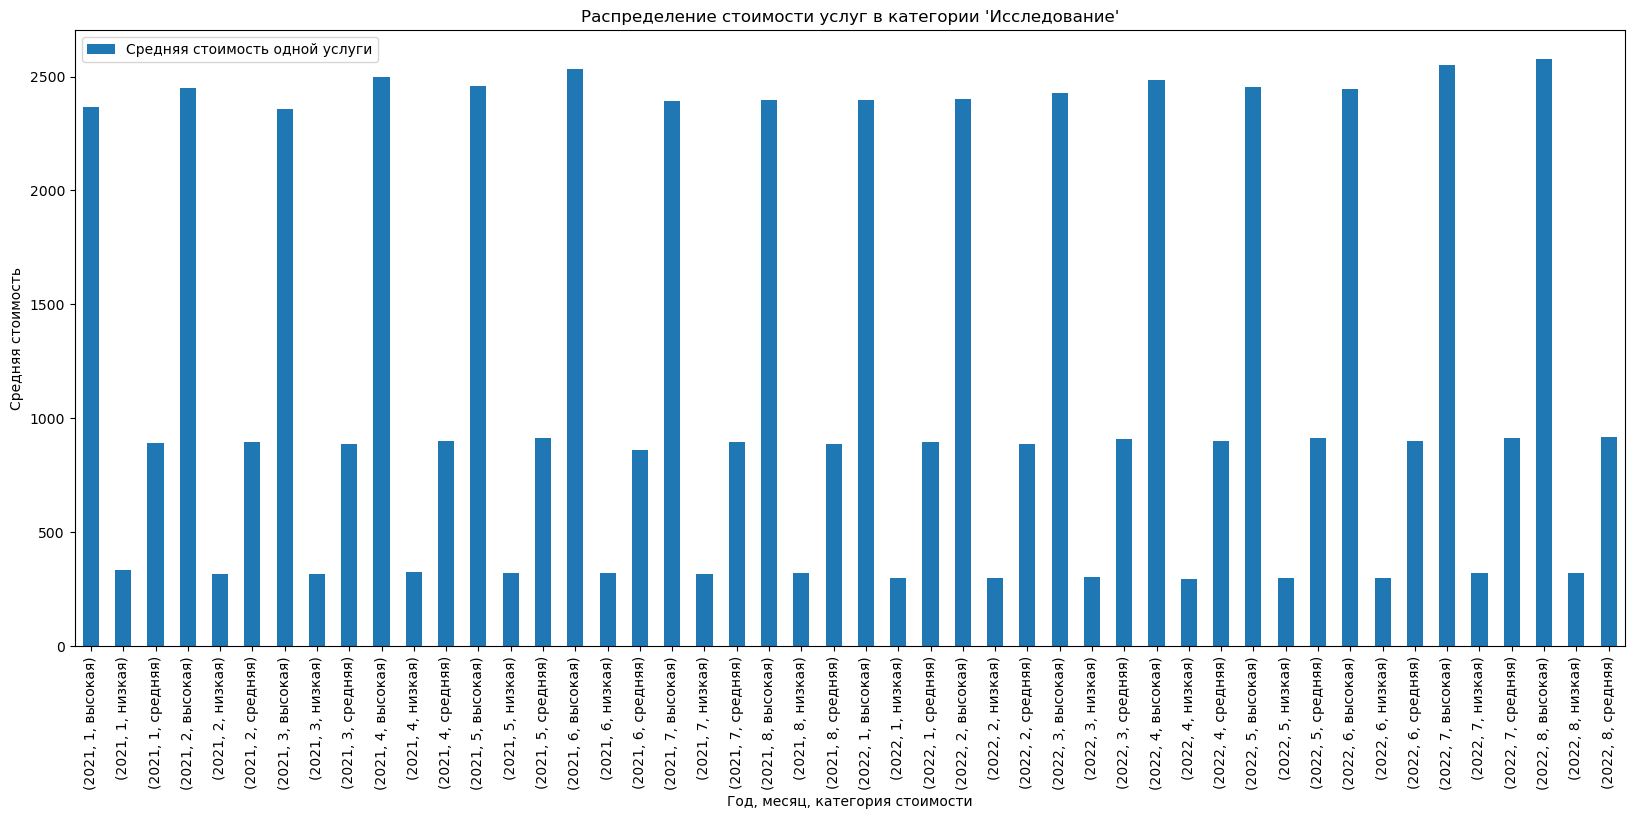

In [124]:
pivot1 = pivot.xs('Исследование', level='name_group')
pivot1.plot(y = 'price', kind='bar', figsize=(20, 8), label='Средняя стоимость одной услуги')
plt.title("Распределение стоимости услуг в категории 'Исследование'")
plt.xlabel("Год, месяц, категория стоимости")
plt.ylabel("Средняя стоимость")
plt.xticks(rotation=90)
plt.show()

В категории "исследования" особой разницы в цене услуг не наблюдается.

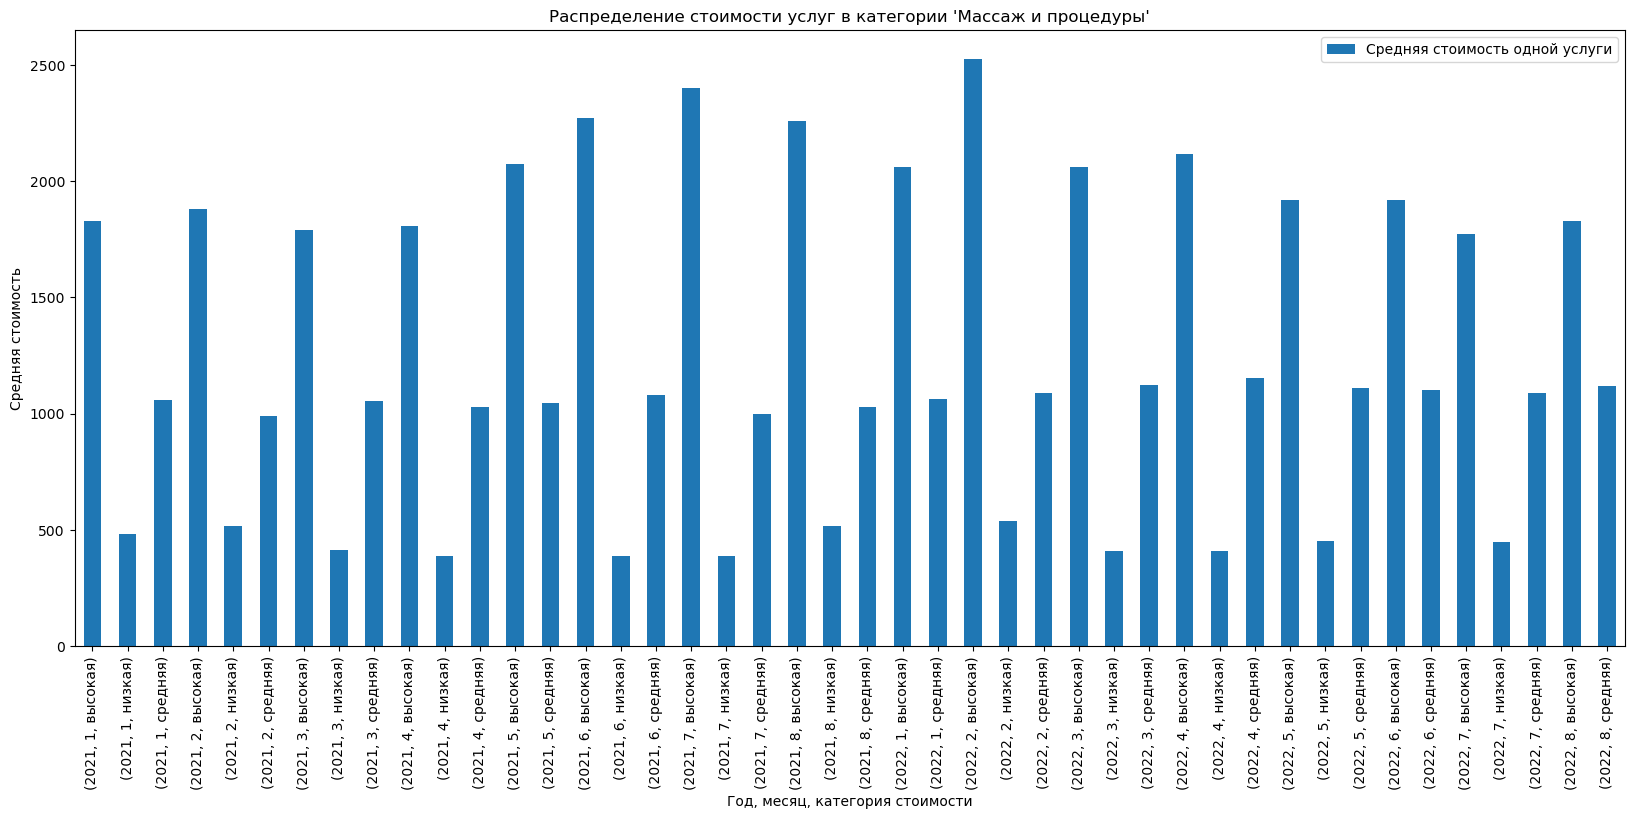

In [125]:
pivot1 = pivot.loc['Массаж и процедуры']
pivot1.plot(y = 'price', kind='bar', figsize=(20, 8), label='Средняя стоимость одной услуги')
plt.title("Распределение стоимости услуг в категории 'Массаж и процедуры'")
plt.xlabel("Год, месяц, категория стоимости")
plt.ylabel("Средняя стоимость")
plt.xticks(rotation=90)
plt.show()

В категории "массаж и процедуры" имеется рост цен начиная с мая 2021 года, заканчивая апрелем 2022 года.

In [126]:
pivot2 = df.pivot_table(index=['price_group', 'name_group', 'service_name', 'year', 'month'], values=['price'], aggfunc='mean')

pivot2 = pivot2.loc[('высокая', 'Массаж и процедуры', slice(None), slice(None))]

#pivot2 = pivot2.groupby('service_name')

pivot2 = pivot2.sort_index(level=['year', 'month'])

display(pivot2)

,,,price
service_name,year,month,
сеанс_рефлексотерапии,2021,1,1827.0
лфк_разовое_групповое_занятие,2021,2,1680.0
сеанс_sis_терапии__длинный_цикл__1_зона,2021,2,3465.0
сеанс_рефлексотерапии,2021,2,1827.0
лфк_разовое_групповое_занятие,2021,3,1680.0
сеанс_рефлексотерапии,2021,3,1827.0
лфк_разовое_групповое_занятие,2021,4,1680.0
сеанс_рефлексотерапии,2021,4,1827.0
сеанс_sis_терапии__длинный_цикл__1_зона,2021,5,3465.0


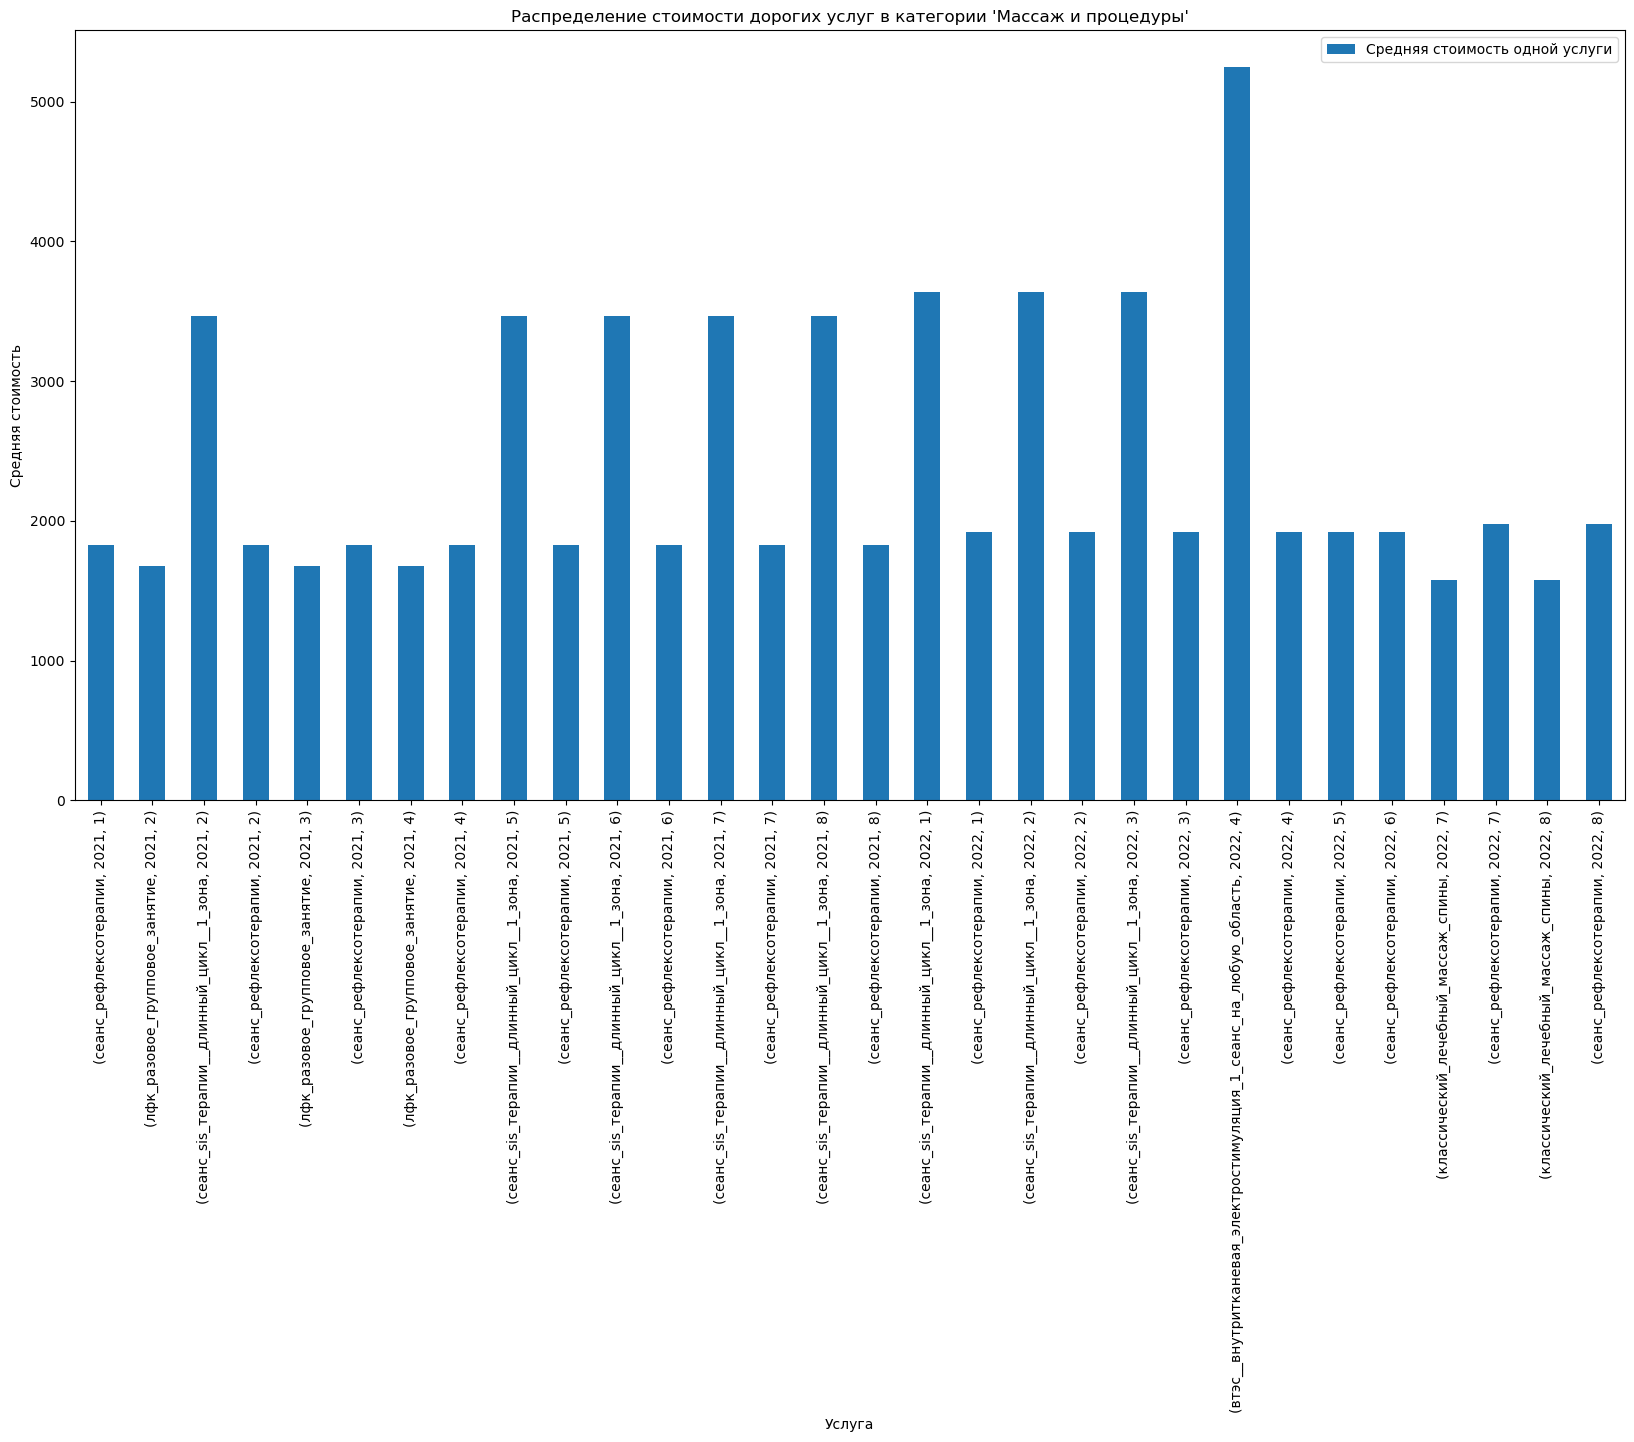

In [127]:
pivot2.plot(y = 'price', kind='bar', figsize=(20, 10), label='Средняя стоимость одной услуги')
plt.title("Распределение стоимости дорогих услуг в категории 'Массаж и процедуры'")
plt.xlabel("Услуга")
plt.ylabel("Средняя стоимость")
plt.xticks(rotation=90)
plt.show()

Как видно в это время часто делались дорогие процедуры "сеанс_sis_терапии_длинный_цикл" и "втэс_внутритканевая_электростимуляция". Выясним кто же это делал.


In [128]:
pivot3 = df.pivot_table(index=['service_name', 'service_number', 'year', 'month'], values=['price'], aggfunc='mean')

pivot3 = pivot3.loc[('сеанс_sis_терапии__длинный_цикл__1_зона', slice(None), slice(None), slice(None), slice(None), slice(None), slice(None), slice(None))]
pivot3

#pivot3 = pivot3.append(pivot3.loc[('втэс_внутритканевая_электростимуляция_1_сеанс_на_любую_область', slice(None), slice(None), slice(None), slice(None), slice(None), slice(None), slice(None), slice(None))])

price
service_number year month        
1              2021 5      3465.0
                    6      3465.0
                    7      3465.0
                    8      3465.0
               2022 1      3640.0
                    2      3640.0
                    3      3640.0
2              2021 2      3465.0
                    7      3465.0
                    8      3465.0

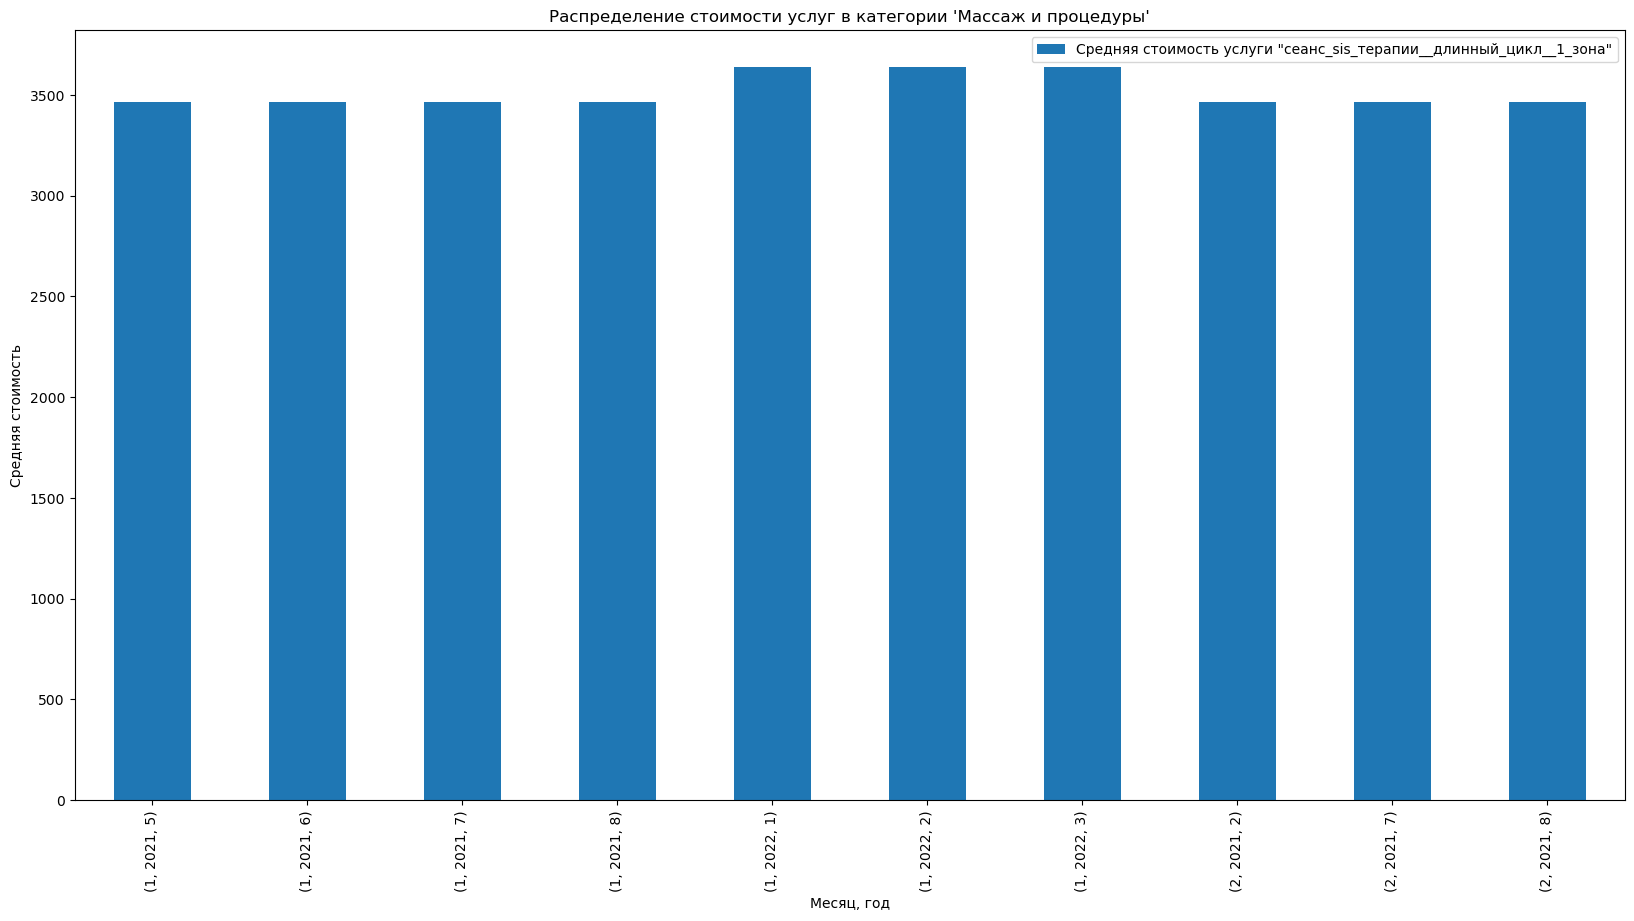

In [129]:
pivot3.plot(y = 'price', kind='bar', figsize=(20, 10), label='Средняя стоимость услуги "сеанс_sis_терапии__длинный_цикл__1_зона"')
plt.title("Распределение стоимости услуг в категории 'Массаж и процедуры'")
plt.xlabel("Месяц, год")
plt.ylabel("Средняя стоимость")
plt.xticks(rotation=90)
plt.show()

С января по март 2022 года услуга 'сеанс_sis_терапии_длинный_цикл_1_зона' имела более высокую цену.

In [130]:
pivot3 = df.pivot_table(index=['service_name', 'service_number', 'insured', 'year', 'month'], values=['price'], aggfunc='mean')

pivot3 = pivot3.loc[('втэс__внутритканевая_электростимуляция_1_сеанс_на_любую_область', slice(None), slice(None), slice(None), slice(None), slice(None), slice(None), slice(None), slice(None))]
pivot3

,,,,price
service_number,insured,year,month,
1,698613,2022,4,5250.0


'втэс_внутритканевая_электростимуляция_1_сеанс_на_любую_область' делал один человек один раз, судя по стоимости из открытых источников - это не ошибка в данных.

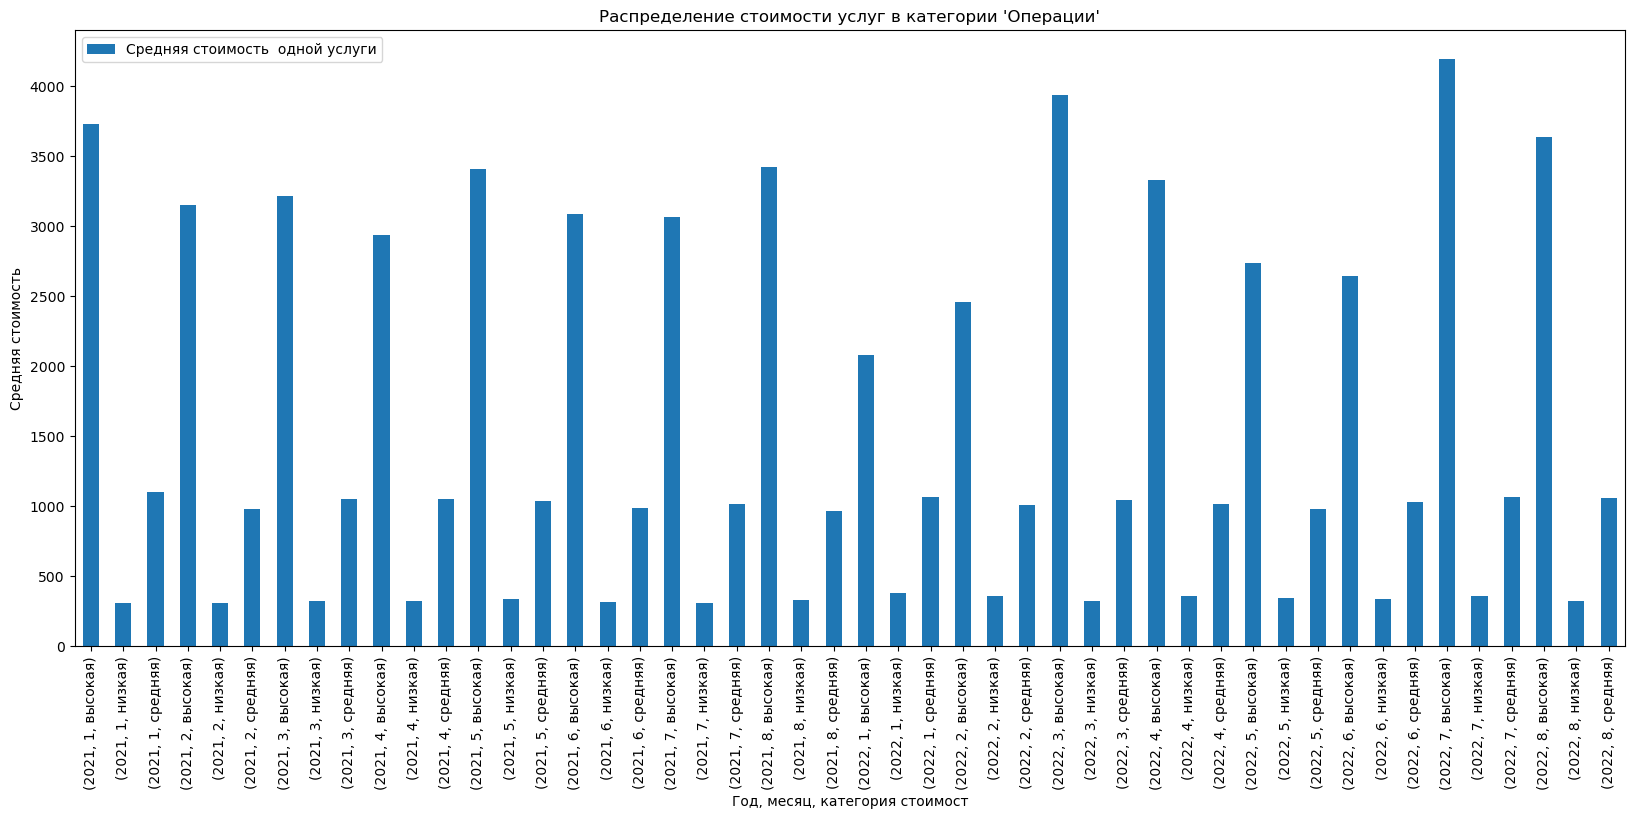

In [131]:
pivot1 = pivot.loc['Операции']
pivot1.plot(y = 'price', kind='bar', figsize=(20, 8), label='Средняя стоимость  одной услуги')
plt.title("Распределение стоимости услуг в категории 'Операции'")
plt.xlabel("Год, месяц, категория стоимост")
plt.ylabel("Средняя стоимость")
plt.xticks(rotation=90)
plt.show()

Что касается операций, то в категории "высокая" цена имеются неоднороднати по месяцам. Посмотрим что же там происходило.

In [132]:
pivot2 = df.pivot_table(index=['price_group', 'name_group', 'service_name', 'year', 'month'], values=['price'], aggfunc='mean')
pivot2 = pivot2.loc[('высокая', 'Операции', slice(None), slice(None))]
pivot2 = pivot2.sort_index(level=['year', 'month'])
display(pivot2)

,,,price
service_name,year,month,
вскрытие_абсцесса_различной_локализации,2021,1,6405.0
инфильтрационная_анестезия_больших_объемов,2021,1,2310.0
медикаментозная_паравертебральная_блокада_без_стоимости_препарата,2021,1,1827.0
снятие_полимерной_повязки,2021,1,2436.0
удаление_вросшего_ногтя,2021,1,6300.0
...,...,...,...
инфильтрационная_анестезия_больших_объемов,2022,8,2670.0
медикаментозная_паравертебральная_блокада_без_стоимости_препарата,2022,8,2110.0
пункция_с_введением_лекарственного_средства_без_стоимости_препарата,2022,8,2530.0


In [133]:
df1 = df.loc[df['price'] > 4000.0]
pivot2 = df1.pivot_table(index=['price_group', 'name_group', 'service_name', 'year', 'month'], values=['price'], aggfunc='mean')
pivot2 = pivot2.loc[('высокая', 'Операции', slice(None), slice(None))]
pivot2 = pivot2.sort_values('price', ascending=False)
pivot2.head(20)

price
service_name                                       year month         
тотальная_внутривенная_анестезия_от_20_минут_до... 2021 6      11550.0
хирургическое_удаление_доброкачественной_опухол... 2022 7       8400.0
вскрытие_панариция                                 2022 7       8400.0
                                                        4       8050.0
хирургическое_удаление_доброкачественной_опухол... 2022 3       8050.0
вскрытие_панариция                                 2021 4       7665.0
                                                        5       7665.0
хирургическое_удаление_доброкачественной_опухол... 2021 3       7665.0
удаление_вросшего_ногтя                            2022 7       7280.0
вскрытие_абсцесса_различной_локализации            2022 7       7100.0
удаление_атеромы                                   2022 6       6950.0
                                                        4       6950.0
                                                        3       6950.0
                                                        7       6950.0
                                                        8       6950.0
вскрытие_абсцесса_различной_локализации            2022 3       6730.0
                                                        4       6730.0
вскрытие_карбункула                                2022 5       6620.0
удаление_вросшего_ногтя                            2022 3       6620.0
удаление_атеромы                                   2021 7       6615.0

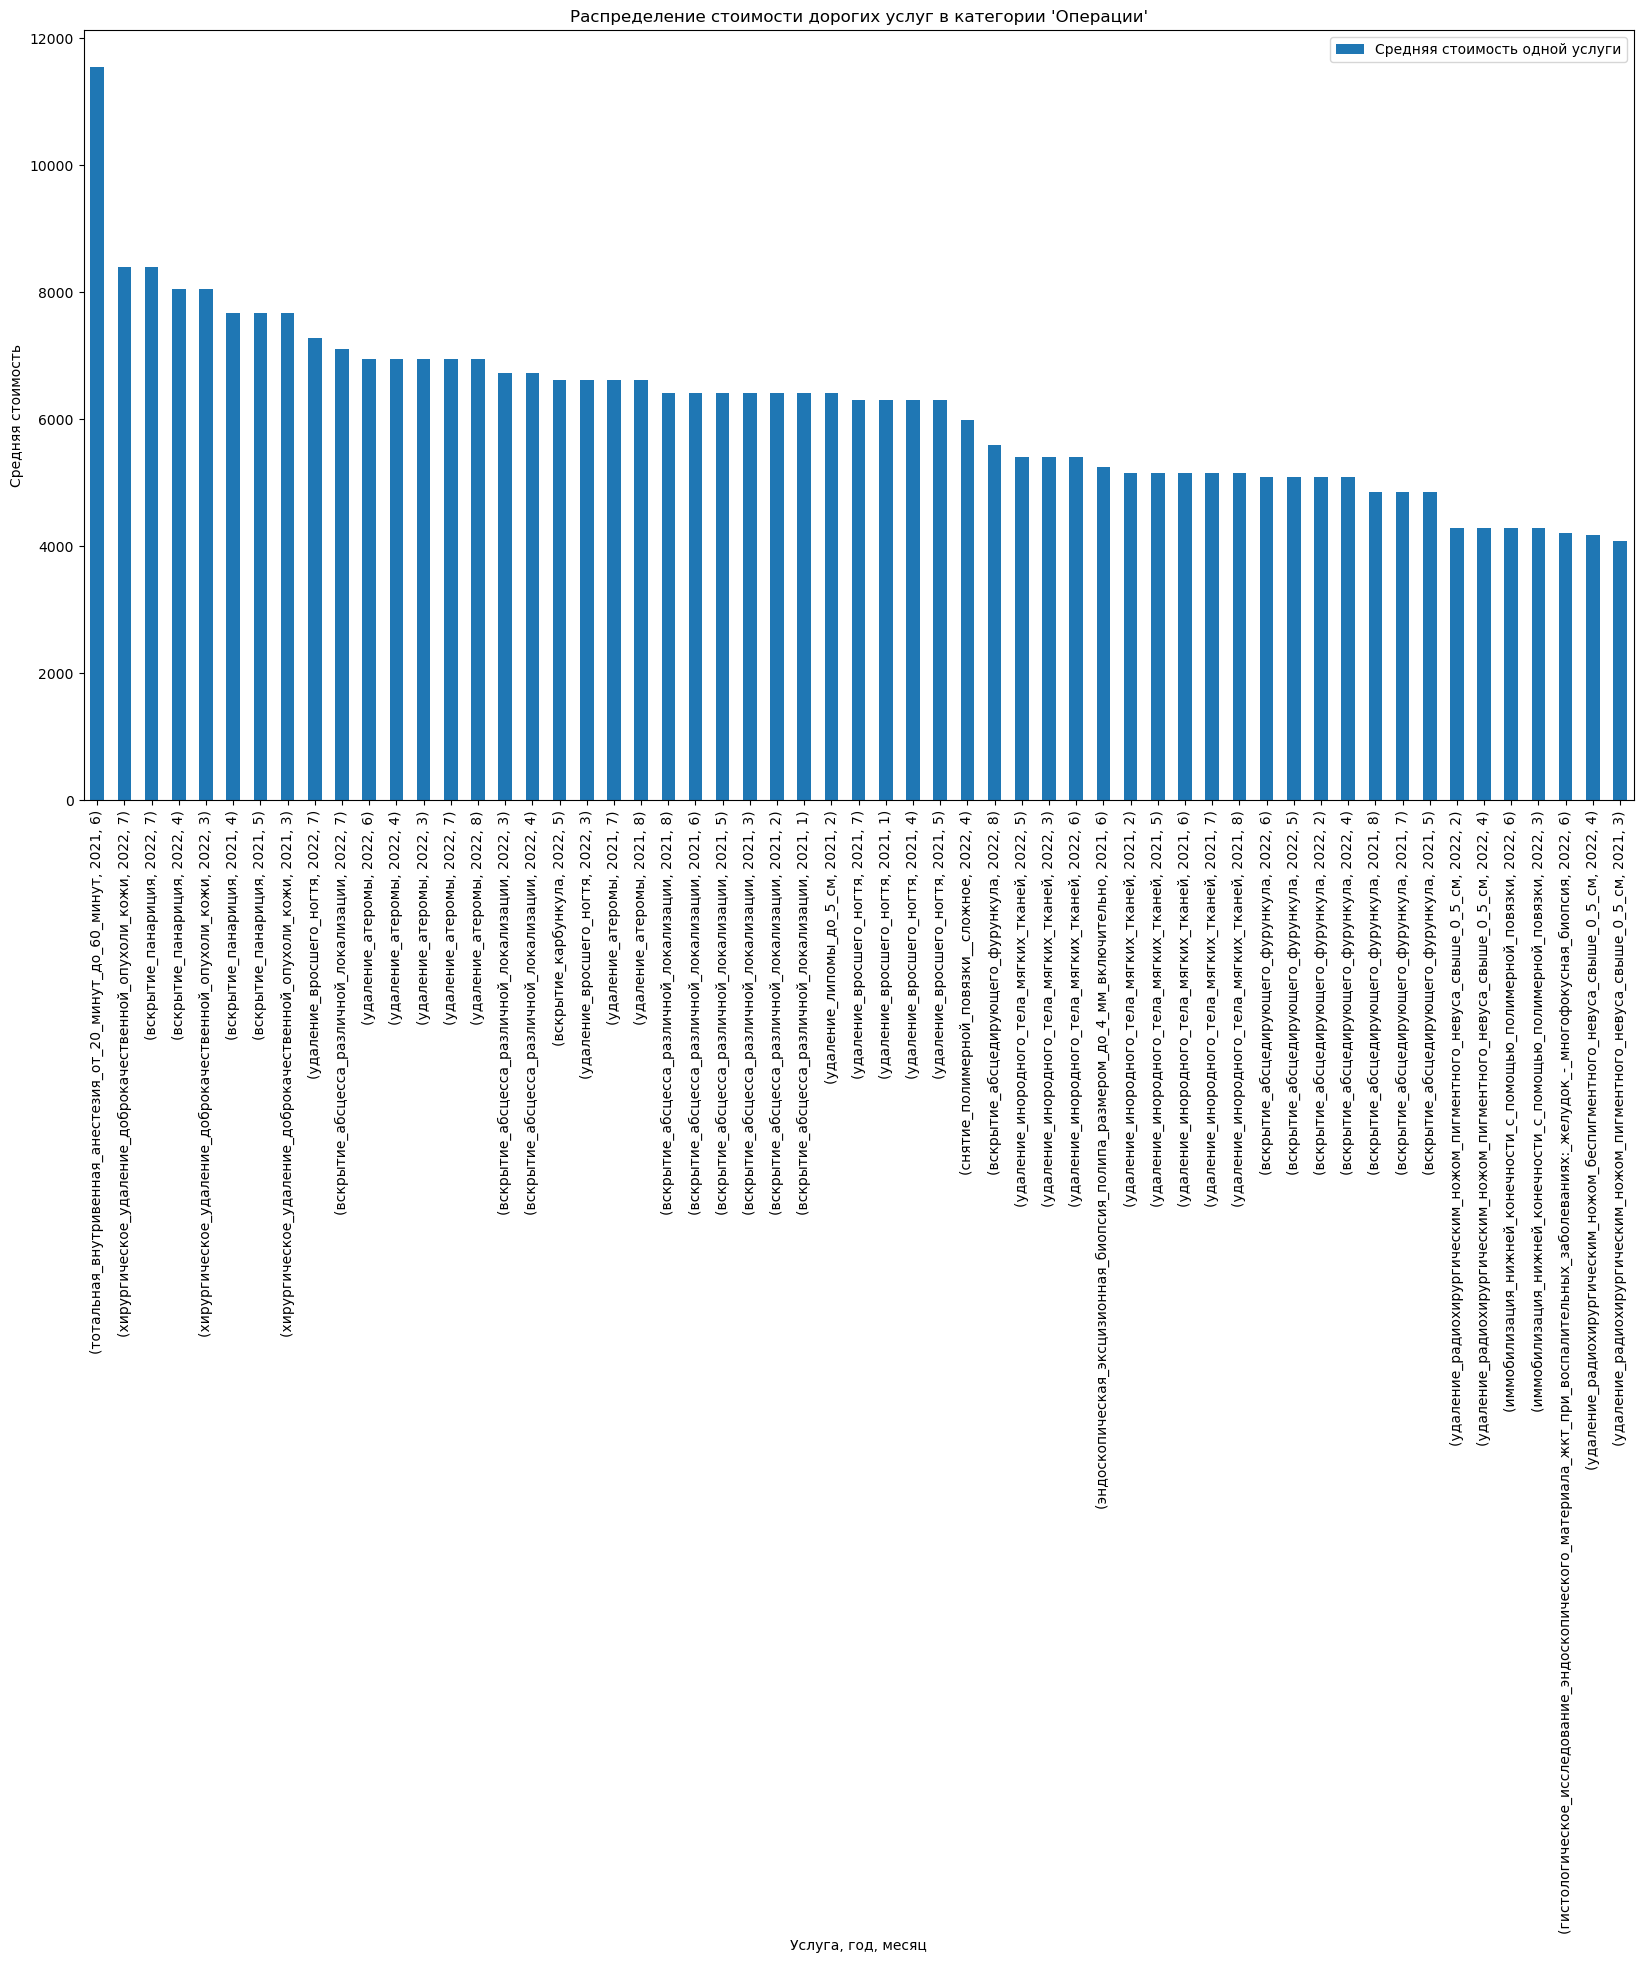

In [134]:
pivot2.plot(y='price', kind='bar', figsize=(20, 10), label='Средняя стоимость одной услуги')
plt.title("Распределение стоимости дорогих услуг в категории 'Операции'")
plt.xlabel("Услуга, год, месяц")
plt.ylabel("Средняя стоимость")
plt.xticks(rotation=90)
plt.show()

Топ 3 самых дорогих операций:
1. тотальная_внутривенная_анестезия делалась  в июне 2021 года
2. хирургическое_удаление_доброкачественной_опухоли_кожи делалась в августе и марте 2022 года и в марте 2021 года. Стоимость данной операции повышалась дважды в 2021 и 2022 годах
3. вскрытие_панариция делалась в августе и апреле 2022 и в апреле 2021

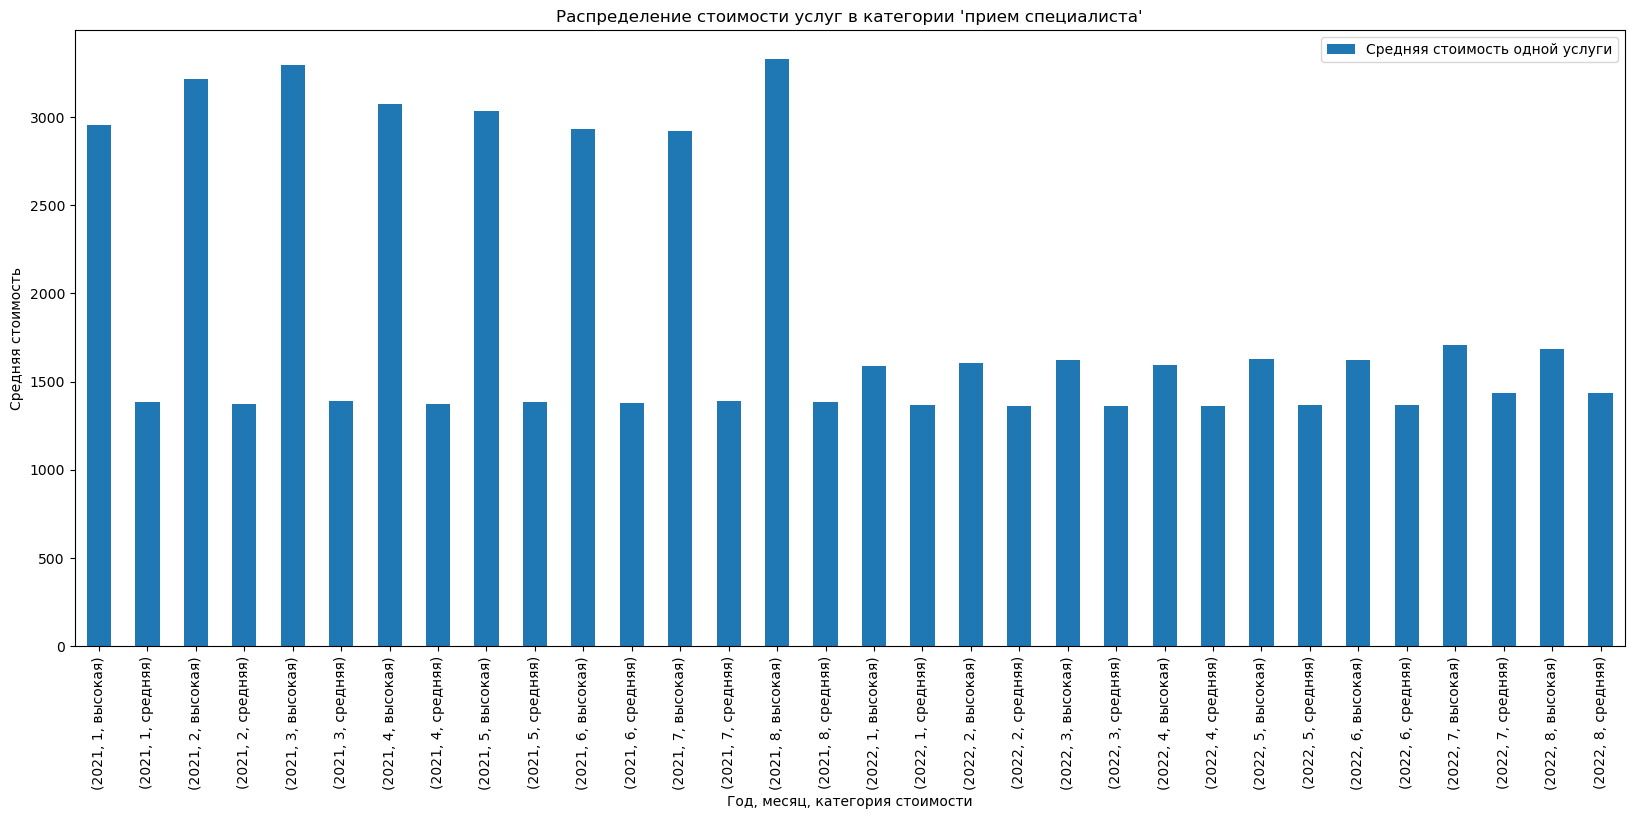

In [135]:
pivot1 = pivot.loc['прием специалиста']
pivot1.plot(y = 'price', kind='bar', figsize=(20, 8), label='Средняя стоимость одной услуги')
plt.title("Распределение стоимости услуг в категории 'прием специалиста'")
plt.xlabel("Год, месяц, категория стоимости")
plt.ylabel("Средняя стоимость")
plt.xticks(rotation=90)
plt.show()

У "приема специалиста" интересная картина, "дорогих" приемов в 2021 году было больше чем в 2022 году.

In [136]:
pivot2 = df.pivot_table(index=['price_group', 'name_group', 'service_name', 'year', 'month'], values=['price'], aggfunc='mean')


pivot2 = pivot2.loc[('высокая', 'прием специалиста', slice(None), slice(None), slice(None))]
pivot2 = pivot2.sort_values('price', ascending=False)
pivot2=pivot2.query("year==2021")

#pivot2 = pivot2.groupby('service_name')

pivot2 = pivot2.sort_index(level=['year', 'month'])
pivot2 = pivot2.sort_values('price', ascending=False)

pivot2.head(20)

price
service_name                                       year month        
прием_на_дому_в_пределах_до_15_км_за_мкад          2021 1      4463.0
расшифровка_холтеровского_мониторирования_на_12... 2021 8      3990.0
прием_главного_специалиста__врача_-_эксперта       2021 7      3780.0
                                                        2      3780.0
                                                        1      3780.0
                                                        4      3780.0
                                                        6      3780.0
                                                        3      3780.0
                                                        5      3780.0
                                                        8      3780.0
прием_на_дому_до_мкад                              2021 2      3413.0
                                                        7      3413.0
                                                        5      3413.0
                                                        3      3413.0
                                                        6      3413.0
                                                        8      3413.0
                                                        4      3413.0
                                                        1      3413.0
прием_психотерапевта                               2021 1      3098.0
                                                        4      3098.0

In [137]:
pivot2 = df.pivot_table(index=['price_group', 'name_group', 'service_name', 'year', 'month'], values=['price'], aggfunc='mean')


pivot2 = pivot2.loc[('высокая', 'прием специалиста', slice(None), slice(None), slice(None))]
pivot2 = pivot2.sort_values('price', ascending=False)
pivot2=pivot2.query("year==2022")

#pivot2 = pivot2.groupby('service_name')

pivot2 = pivot2.sort_index(level=['year', 'month'])
pivot2 = pivot2.sort_values('price', ascending=False)

pivot2.head(10)

price
service_name                                       year month        
прием_врача_эндокринолога__руководителя_направл... 2022 7      5510.0
прием_врача_эндокринолога__руководителя_направл... 2022 8      5510.0
прием_гинеколога__профессора                       2022 6      5510.0
прием_отоларинголога__профессора                   2022 6      5510.0
прием_отоневролога                                 2022 5      5250.0
прием_педиатра__главного_специалиста__врача_-_э... 2022 8      4370.0
                                                        7      4370.0
прием_травматолога-ортопеда__главного_специалис... 2022 7      4370.0
расшифровка_холтеровского_мониторирования_на_12... 2022 5      4190.0
                                                        3      4190.0

В 2021 году очевидное влияние на структуру приемов специалистов произвели отголоски КОВИД-19. Первое место по стоимости заняли "приемы врачей на дому". В 2022 году же на первое место по стоимости вышли "приемы_врача_эндокринолога__руководителя_направления".

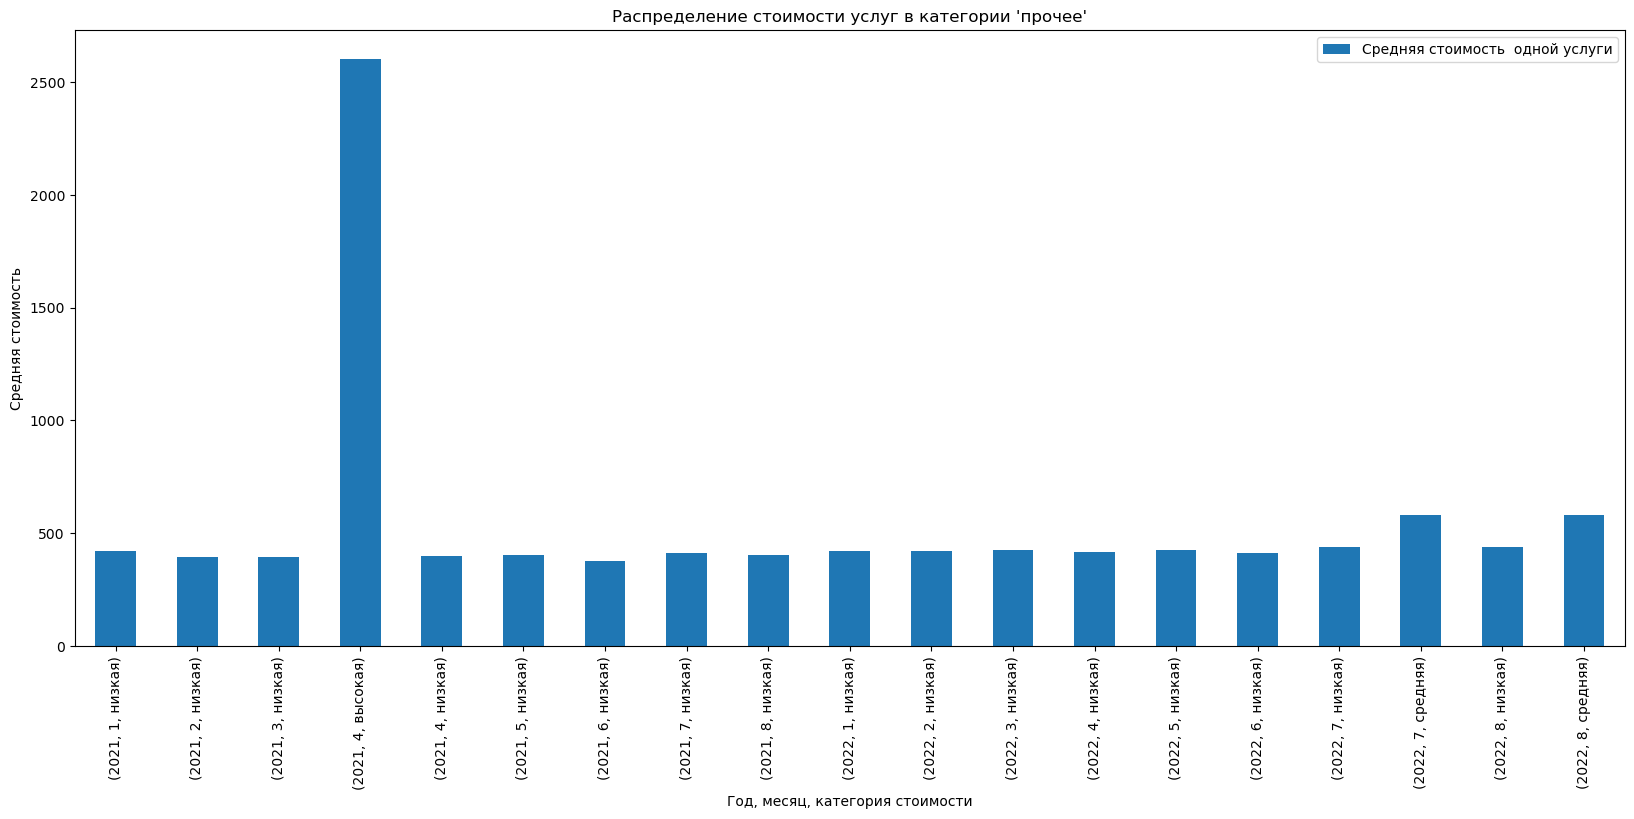

In [138]:
pivot1 = pivot.loc['прочее']
pivot1.plot(y = 'price', kind='bar', figsize=(20, 8), label='Средняя стоимость  одной услуги')
plt.title("Распределение стоимости услуг в категории 'прочее'")
plt.xlabel("Год, месяц, категория стоимости")
plt.ylabel("Средняя стоимость")
plt.xticks(rotation=90)
plt.show()

В категории "прочее" все стабильно кроме апреля 2021 года, когда появляется дорогостоящие позиции.

In [139]:
pivot2 = df.pivot_table(index=['price_group', 'name_group', 'service_name', 'year', 'month'], values=['price'], aggfunc='mean')


pivot2 = pivot2.loc[('высокая', 'прочее', slice(None), slice(None), slice(None))]
pivot2 = pivot2.sort_values('price', ascending=False)
pivot2=pivot2.query("year==2021")

#pivot2 = pivot2.groupby('service_name')

pivot2 = pivot2.sort_index(level=['year', 'month'])
pivot2 = pivot2.sort_values('price', ascending=False)

pivot2.head(15)

,,,price
service_name,year,month,
подбор_срар_терапии,2021,4,2600.0


Основной пик в группе "прочее" составляет "подбор_срар_терапии"

Промежуточный вывод:
1. В категории "исследования" особой разницы в цене услуг не наблюдается. 
2.В категории "массаж и процедуры" имеется рост цен начиная с мая 2021 года, заканчивая апрелем 2022 года. В это время часто делались дорогие процедуры "сеанс_sis_терапии_длинный_цикл" и "втэс_внутритканевая_электростимуляция". С января по март 2022 года услуга 'сеанс_sis_терапии_длинный_цикл1зона' имела более высокую цену. 'втэс_внутритканевая_электростимуляция1сеанс_на_любую_область' делал один человек один раз.
3. Что касается операций, то в категории "высокая" цена имеются неоднороднати по месяцам. Топ 3 самых дорогих операций: тотальная_внутривенная_анестезия делалась в июне 2021 года; хирургическое_удаление_доброкачественной_опухоли_кожи делалась в августе и марте 2022 года и в марте 2021 года, стоимость данной операции повышалась дважды в 2021 и 2022 годах;  вскрытие_панариция делалась в августе и апреле 2022 и в апреле 2021
4. У "приема специалиста" интересная картина, "дорогих" приемов в 2021 году было больше чем в 2022 году. В 2021 году очевидное влияние на структуру приемов специалистов произвели отголоски КОВИД-19. Первое место по стоимости заняли "приемы врачей на дому". В 2022 году же на первое место по стоимости вышли "приемы_врача_эндокринолога__руководителя_направления"
5. В категории "прочее" все стабильно кроме апреля 2021 года, когда появляется дорогостоящая позиция - подбор_срар_терапии.




========================================================================================================

# Анализ изменения цены по возрасту

In [140]:
pivot = df.pivot_table(index=['age_group', 'year', 'month', 'price_group'], values=['price'], aggfunc='mean')
display(pivot)

price
age_group            year month price_group             
пенсионер 60 и более 2021 1     высокая      2155.187500
                                низкая        321.966667
                                средняя      1129.720000
                          2     высокая      2605.000000
                                низкая        331.589286
...                                                  ...
средний 18-45 лет    2022 7     низкая        325.887909
                                средняя      1104.212651
                          8     высокая      2008.841146
                                низкая        320.514599
                                средняя      1075.504630

[240 rows x 1 columns]

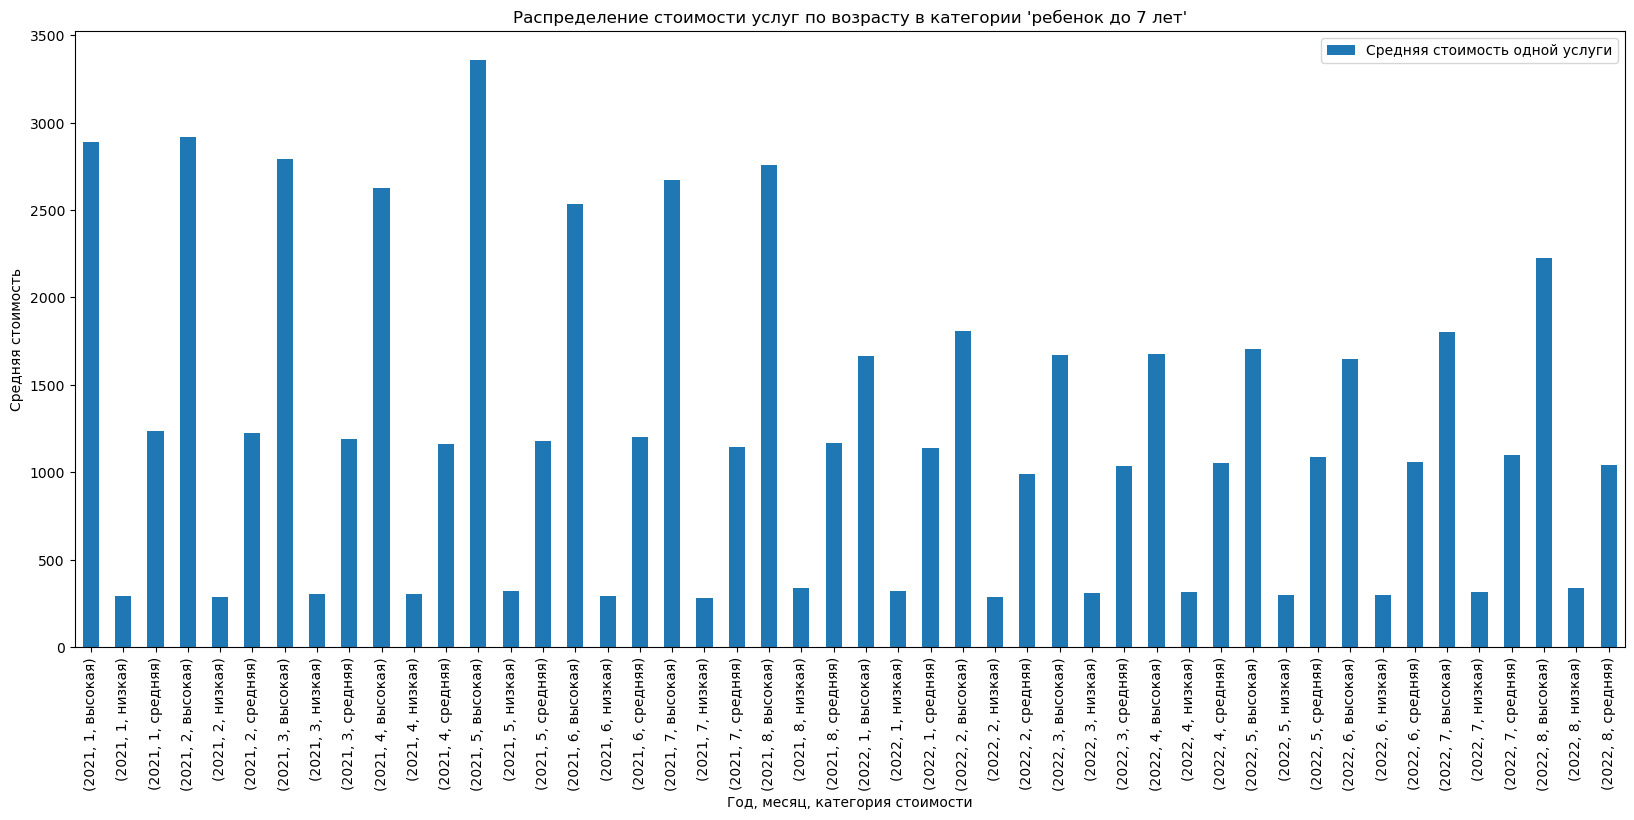

In [141]:
pivot1 = pivot.loc['ребенок до 7 лет']
pivot1.plot(y = 'price', kind='bar', figsize=(20, 8), label='Средняя стоимость одной услуги')
plt.title("Распределение стоимости услуг по возрасту в категории 'ребенок до 7 лет'")
plt.xlabel("Год, месяц, категория стоимости")
plt.ylabel("Средняя стоимость")
plt.xticks(rotation=90)
plt.show()

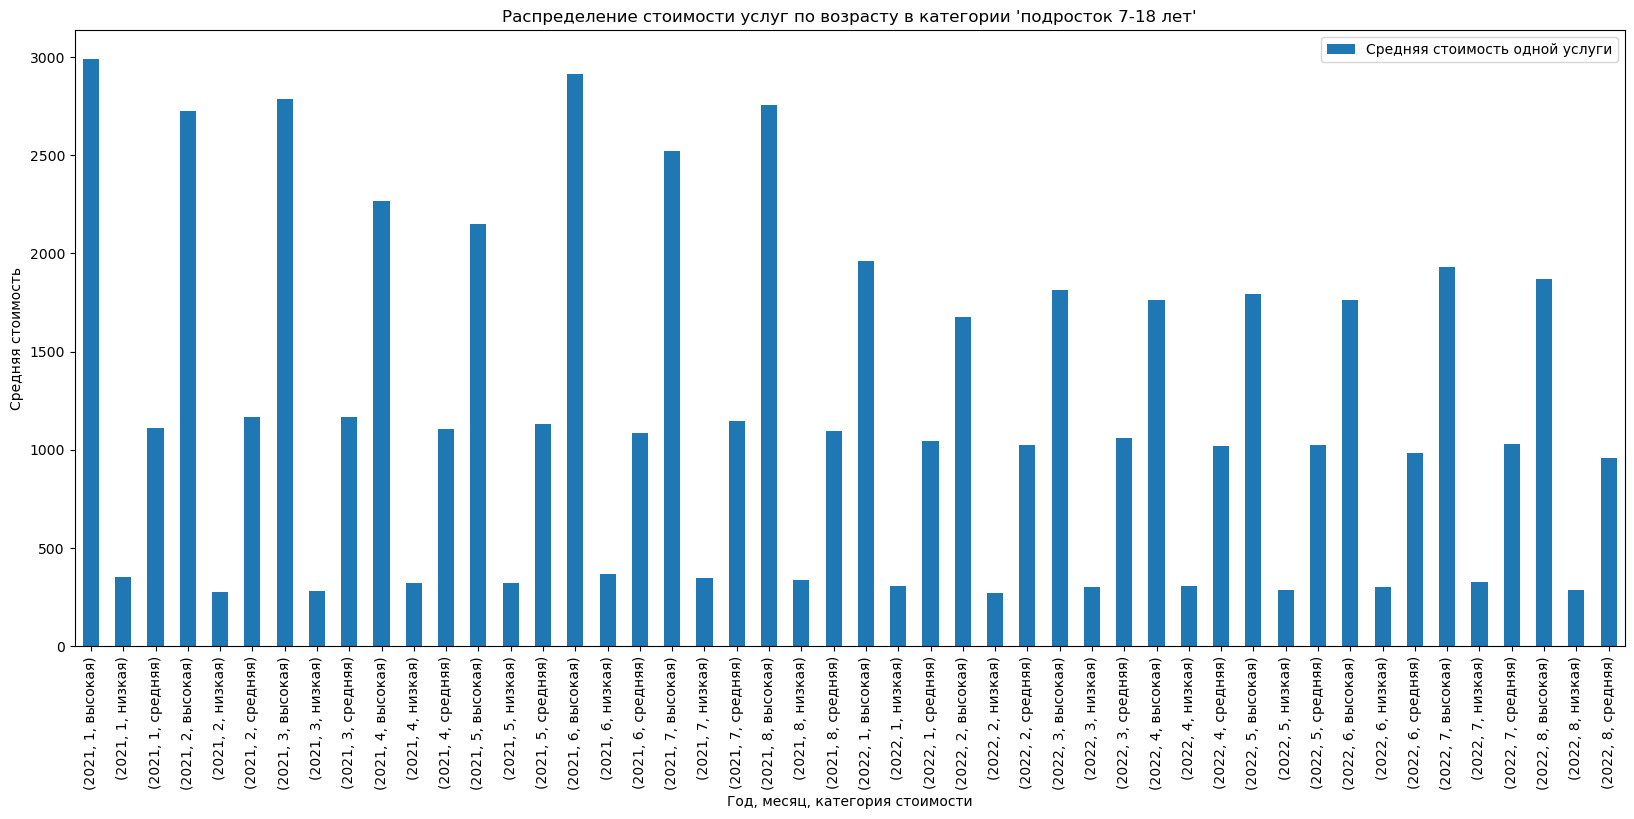

In [142]:
pivot1 = pivot.loc['подросток 7-18 лет']
pivot1.plot(y = 'price', kind='bar', figsize=(20, 8), label='Средняя стоимость одной услуги')
plt.title("Распределение стоимости услуг по возрасту в категории 'подросток 7-18 лет'")
plt.xlabel("Год, месяц, категория стоимости")
plt.ylabel("Средняя стоимость")
plt.xticks(rotation=90)
plt.show()

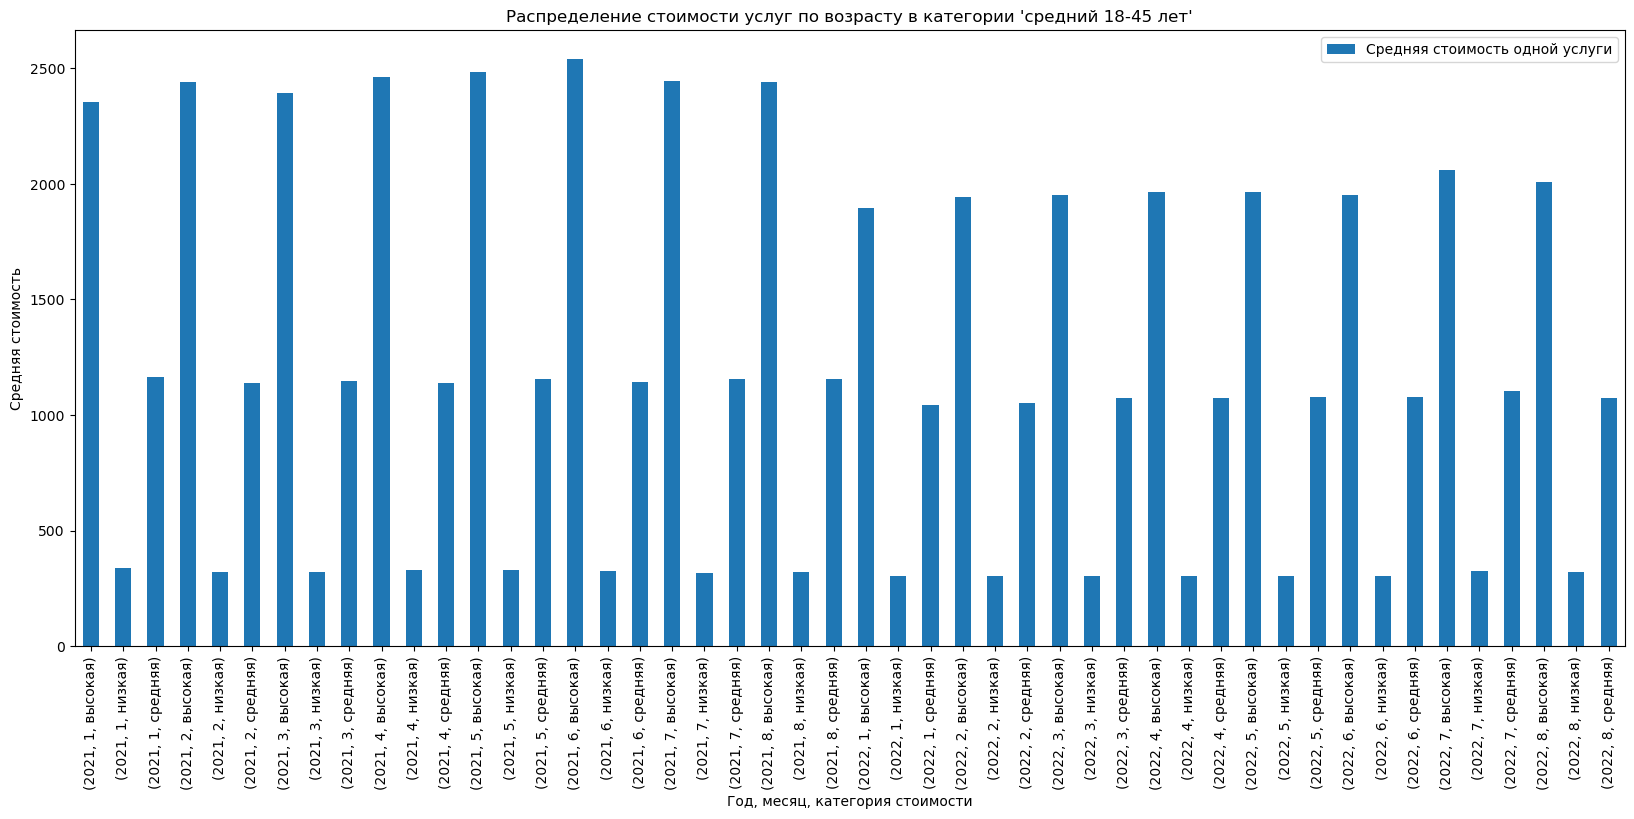

In [143]:
pivot1 = pivot.loc['средний 18-45 лет']
pivot1.plot(y = 'price', kind='bar', figsize=(20, 8), label='Средняя стоимость одной услуги')
plt.title("Распределение стоимости услуг по возрасту в категории 'средний 18-45 лет'")
plt.xlabel("Год, месяц, категория стоимости")
plt.ylabel("Средняя стоимость")
plt.xticks(rotation=90)
plt.show()

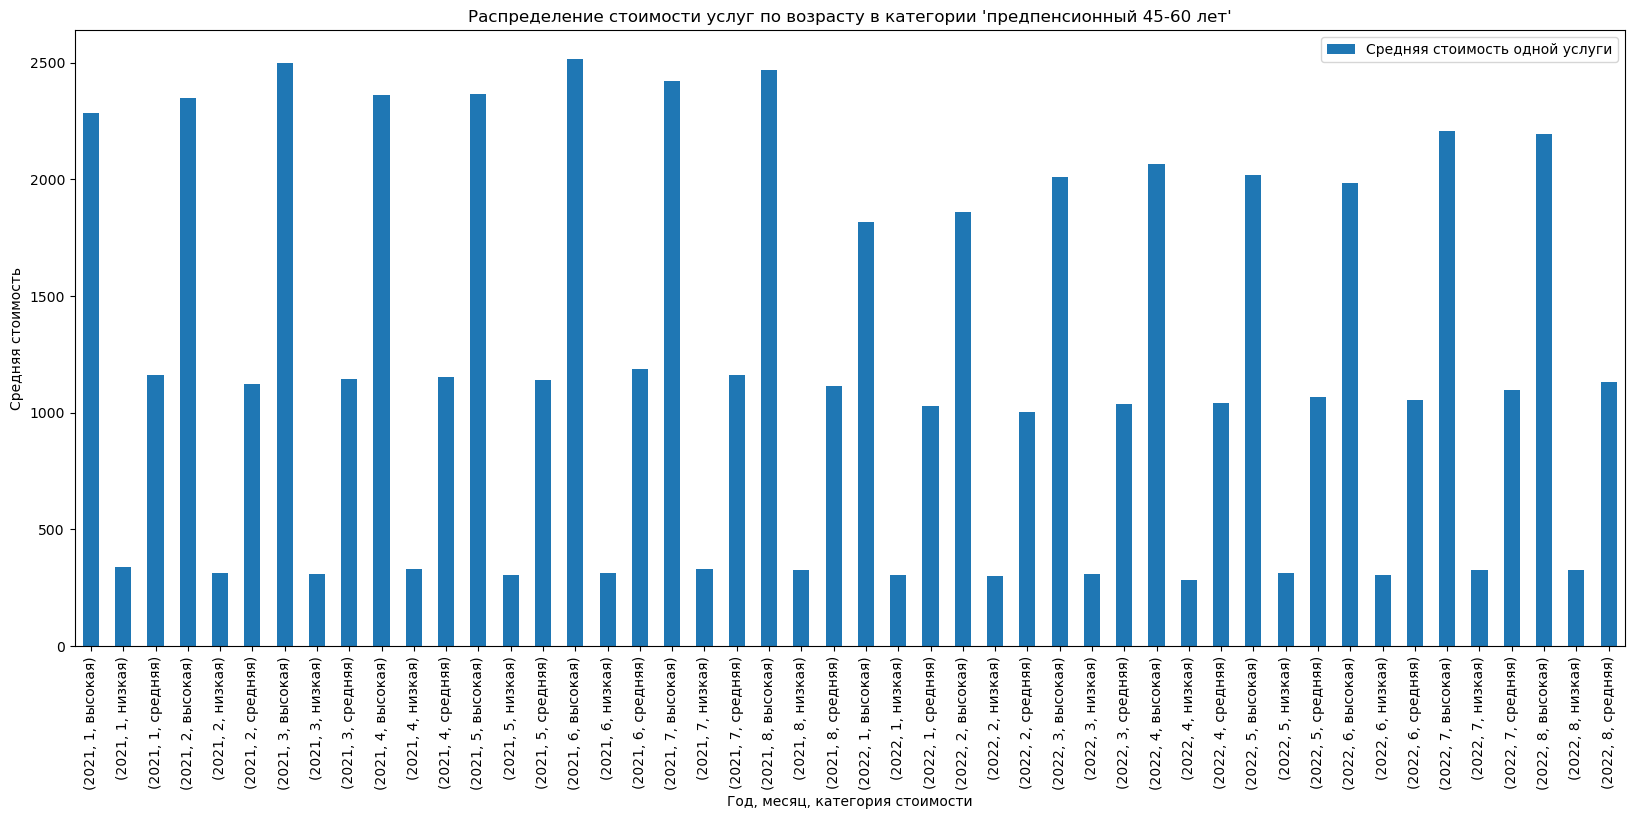

In [144]:
pivot1 = pivot.loc['предпенсионный 45-60 лет']
pivot1.plot(y = 'price', kind='bar', figsize=(20, 8), label='Средняя стоимость одной услуги')
plt.title("Распределение стоимости услуг по возрасту в категории 'предпенсионный 45-60 лет'")
plt.xlabel("Год, месяц, категория стоимости")
plt.ylabel("Средняя стоимость")
plt.xticks(rotation=90)
plt.show()

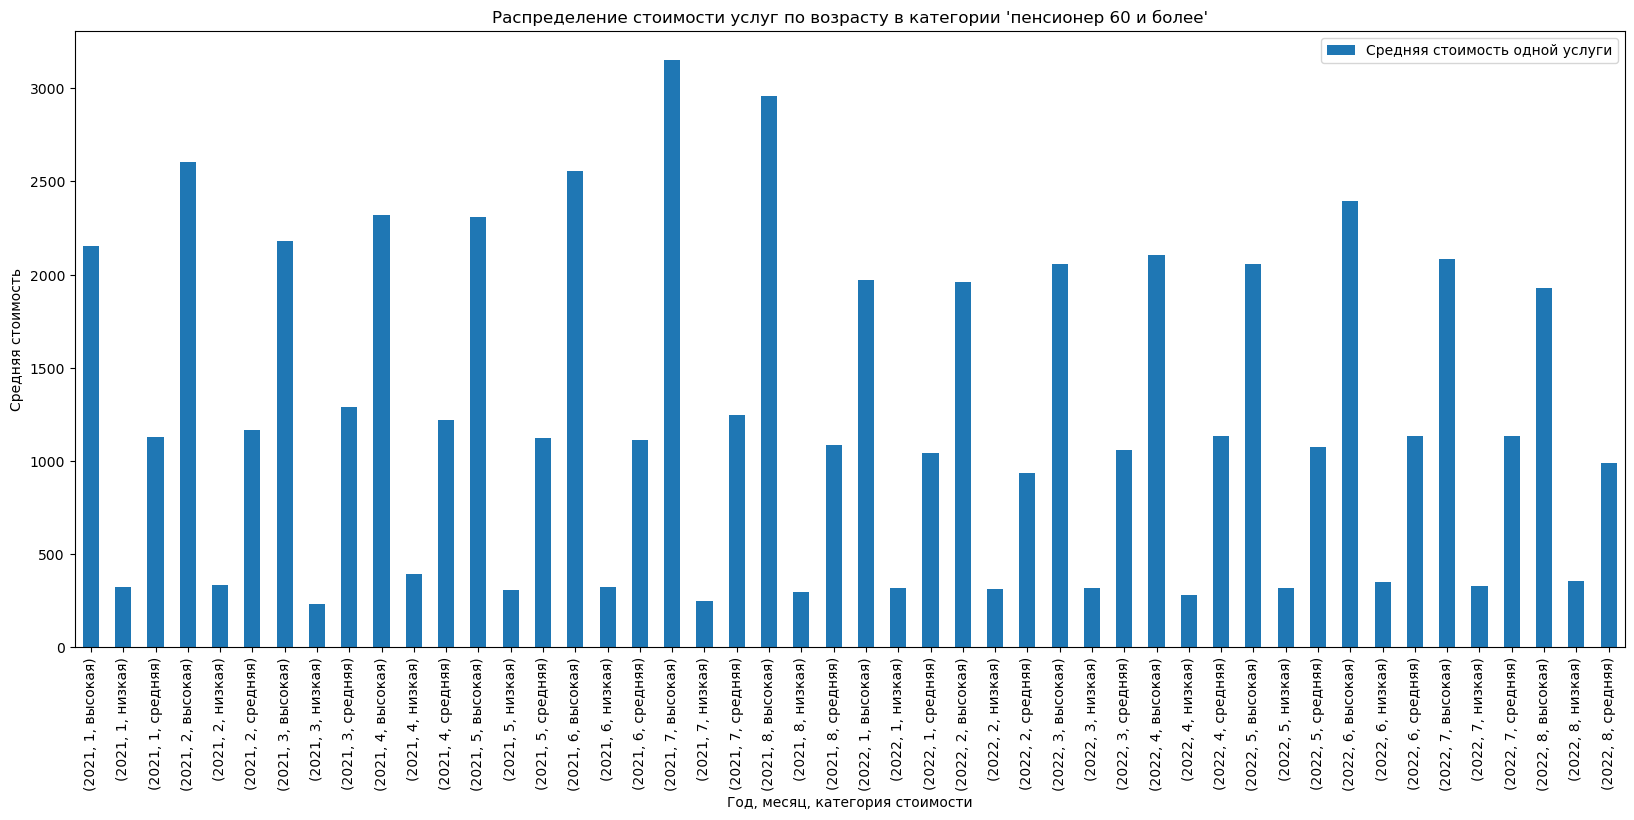

In [145]:
pivot1 = pivot.loc['пенсионер 60 и более']
pivot1.plot(y = 'price', kind='bar', figsize=(20, 8), label='Средняя стоимость одной услуги')
plt.title("Распределение стоимости услуг по возрасту в категории 'пенсионер 60 и более'")
plt.xlabel("Год, месяц, категория стоимости")
plt.ylabel("Средняя стоимость")
plt.xticks(rotation=90)
plt.show()

В дорогом сегменте очень интерессная  картина. В 2021 году стоимость услуг выше чем в 2022 году. Почему, интерессно))


In [146]:
pivot2 = df.pivot_table(index=['price_group', 'service_name', 'year', 'month'], values=['price'], aggfunc='mean')


pivot2 = pivot2.loc[('высокая', slice(None), slice(None), slice(None), slice(None))]

pivot2=pivot2.query("year==2021")

pivot2 = pivot2.sort_index(level=['year', 'month'])
pivot2 = pivot2.sort_values('price', ascending=False)
pivot2 = pivot2.groupby('service_name')

pivot2.head(10)

,,,price
service_name,year,month,
мрт_брюшной_полости_и_забрюшинного_пространства_с_внутривенным_контрастированием,2021,6,17325.0
мрт_головного_мозга_и_гипофиза_с_контрастированием,2021,8,15225.0
мскт_мочевыделительной_системы_с_внутривенным_болюсным_контрастированием,2021,6,12075.0
тотальная_внутривенная_анестезия_от_20_минут_до_60_минут,2021,6,11550.0
мскт_почек_и_надпочечников_с_внутривенным_болюсным_контрастированием,2021,4,11025.0
...,...,...,...
хирургическая_обработка_ожога_более_1%_1-2ст,2021,6,1575.0
рентгенография_крупного_сустава_2_снимка,2021,5,1575.0
ультразвуковое_исследование_мочевого_пузыря,2021,1,1575.0


In [147]:
pivot2 = df.pivot_table(index=['price_group', 'service_name', 'year', 'month'], values=['price'], aggfunc='mean')


pivot2 = pivot2.loc[('высокая', slice(None), slice(None), slice(None), slice(None))]

pivot2=pivot2.query("year==2022")

pivot2 = pivot2.sort_index(level=['year', 'month'])
pivot2 = pivot2.sort_values('price', ascending=False)
pivot2 = pivot2.groupby('service_name')

pivot2.head(10)

,,,price
service_name,year,month,
эндоскопическая_полипэктомия_2-й_категории__от_0_6_до_1_0см_,2022,6,9700.0
вакцинация_вакциной_менактра,2022,8,9000.0
хирургическое_удаление_доброкачественной_опухоли_кожи,2022,7,8400.0
вскрытие_панариция,2022,7,8400.0
мскт_мягких_тканей_шеи_с_фонацией,2022,8,8270.0
...,...,...,...
прием_гастроэнтеролога__первичный,2022,6,1540.0
прием_аллерголога__первичный,2022,6,1540.0
прием_офтальмолога___первичный,2022,4,1540.0


В 2021 году страна начала выход из ограничений по ковид, возможно люди начали проводить плановые операции и обследования, плюс в 2022 началась СВО и экономическая ситуация у людей ухудшилась.

Промежуточные выводы:
    Во всех возрастных категориях видно то, что стоимость дорогого лечения в 2021 году выше чем в 2022 году. В 2021 году страна начала выход из ограничений по ковид, возможно люди начали проводить плановые операции и обследования, плюс в 2022 началась СВО и экономическая ситуация у людей ухудшилась.

=====================================================================================================

# Анализ изменения цены по гендерному фактору

In [148]:

pivot = df.pivot_table(index=['sex_id', 'year', 'month'], values=['price'], aggfunc='mean')
display(pivot)

price
sex_id year month             
man    2021 1      1175.255682
            2      1093.485795
            3      1061.354510
            4      1104.415891
            5      1180.891960
            6      1112.773154
            7      1103.712249
            8      1123.498034
       2022 1      1122.175824
            2      1111.537298
            3      1180.330275
            4      1213.068689
            5      1149.841663
            6      1168.597804
            7      1268.165800
            8      1239.042914
woman  2021 1      1051.532530
            2      1092.933133
            3      1017.547253
            4      1101.960600
            5      1062.423895
            6      1108.860097
            7      1025.373340
            8      1091.279070
       2022 1      1156.184722
            2      1162.195451
            3      1123.670134
            4      1167.652878
            5      1190.891749
            6      1192.839670
            7      1270.033299
            8      1198.592099

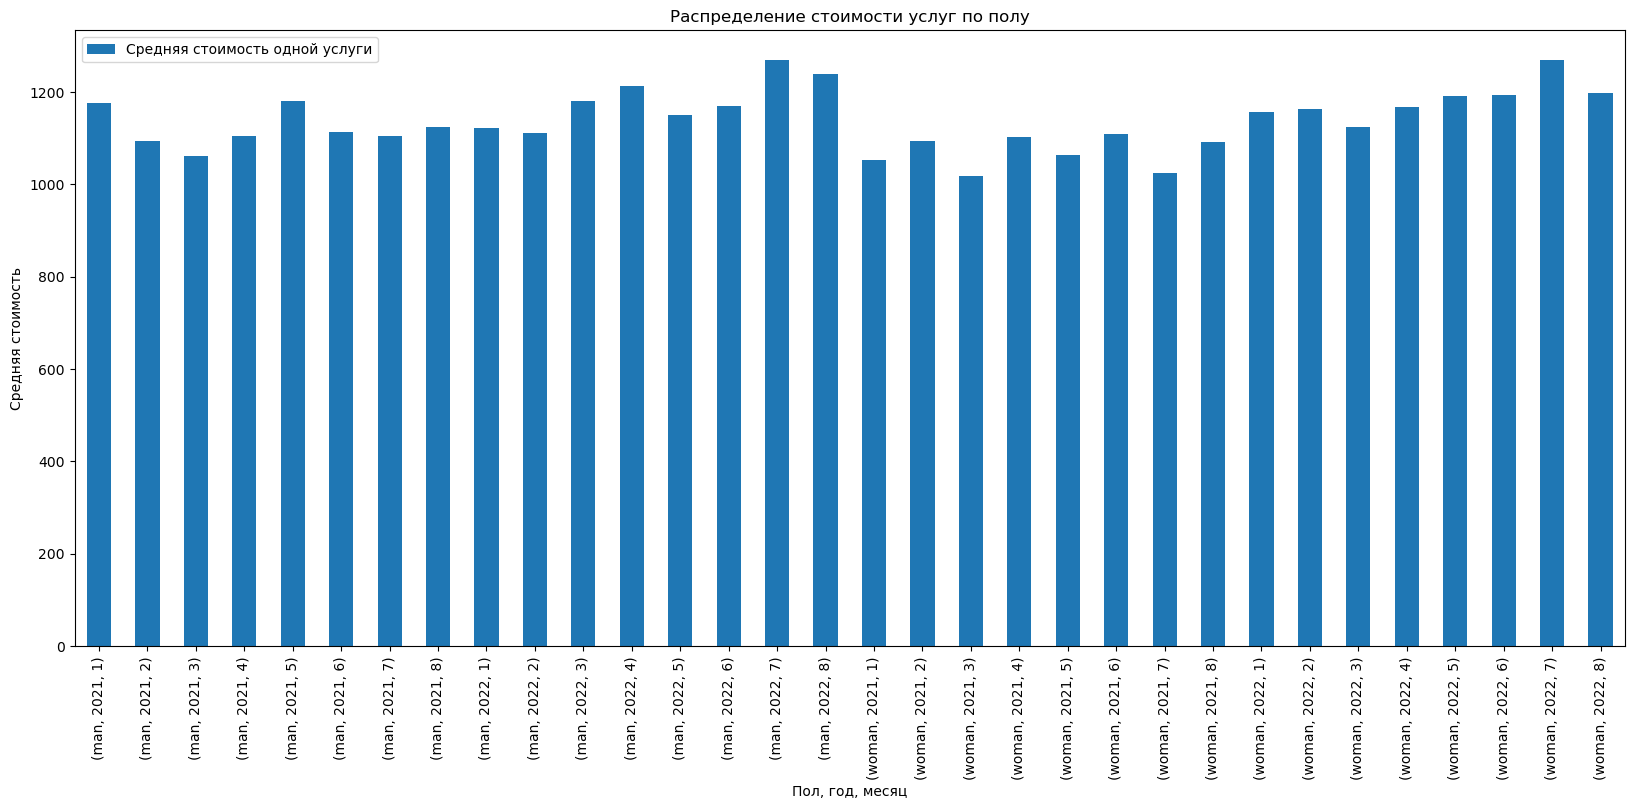

In [149]:
pivot.plot(y = 'price', kind='bar', figsize=(20, 8), label='Средняя стоимость одной услуги')
plt.title("Распределение стоимости услуг по полу")
plt.xlabel("Пол, год, месяц")
plt.ylabel("Средняя стоимость")
plt.xticks(rotation=90)
plt.show()

Координально большой разницы между полами в тратах на лечение нет. Видно не большое повышение в стоимости лечения мужчин начиная с 3 месяца 2022 года, видно из-за СВО.

In [150]:
pivot = df.pivot_table(index=['sex_id', 'year'], values=['price', 'service_amount'], aggfunc='mean')
display(pivot)

price  service_amount
sex_id year                             
man    2021  1116.525272     1127.401912
       2022  1178.601963     1189.633459
woman  2021  1069.587617     1092.511735
       2022  1181.930667     1199.118957

In [151]:
pivot = df.pivot_table(index=['sex_id', 'year'], values=['price', 'service_amount'], aggfunc='sum')
display(pivot)

price  service_amount
sex_id year                            
man    2021  10978793.0        11085743
       2022  17887642.0        18055067
woman  2021  16998956.0        17363289
       2022  30463081.0        30906092

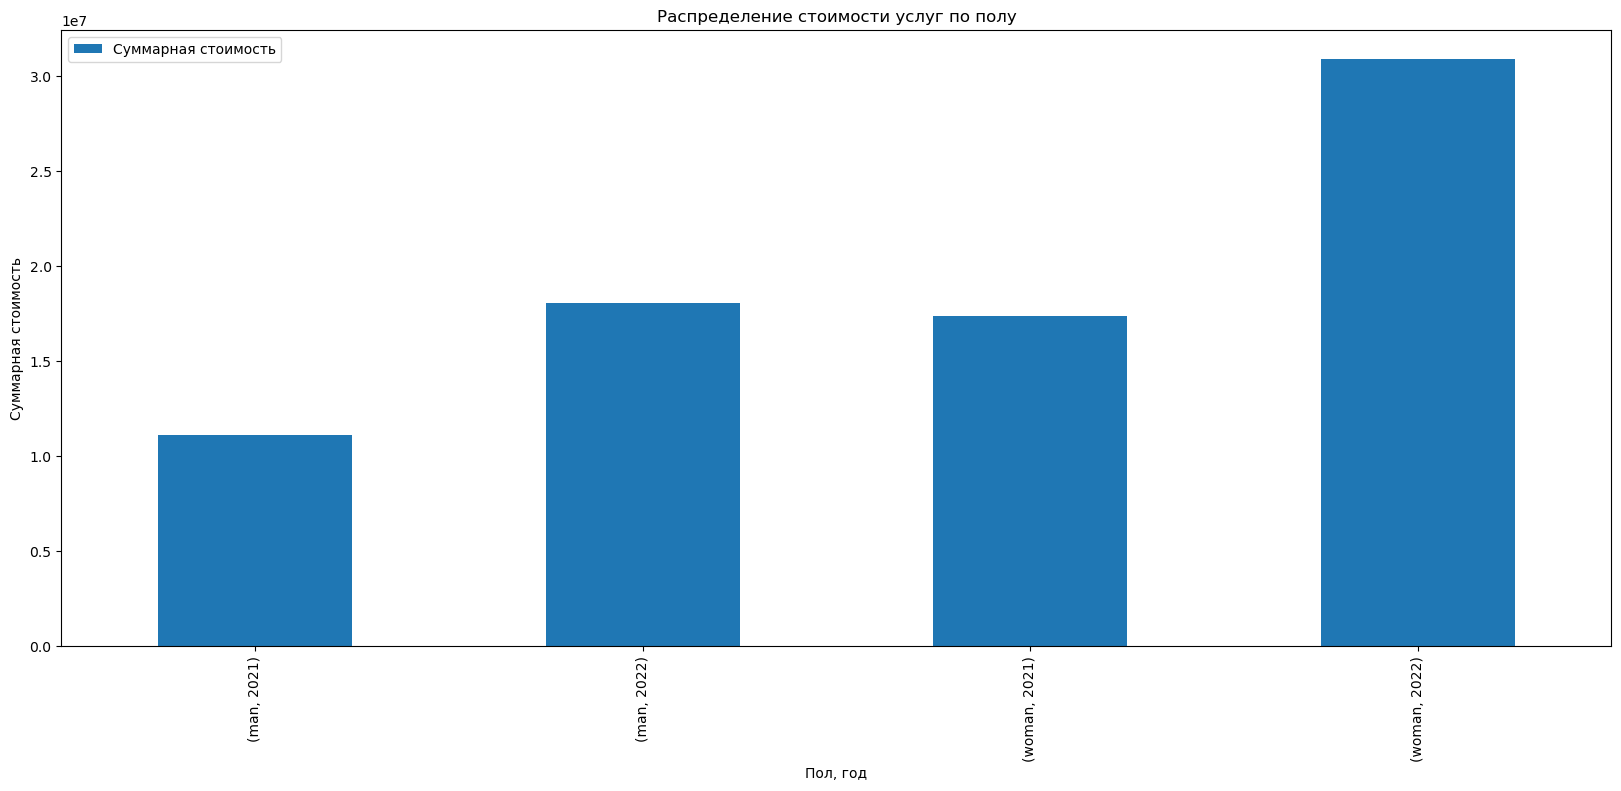

In [152]:
pivot.plot(y = 'service_amount', kind='bar', figsize=(20, 8), label='Суммарная стоимость')
plt.title("Распределение стоимости услуг по полу")
plt.xlabel("Пол, год")
plt.ylabel("Суммарная стоимость")
plt.xticks(rotation=90)
plt.show()

In [153]:
pivot2 = df.pivot_table(index=['price_group', 'sex_id', 'service_name', 'year', 'month'], values=['price'], aggfunc='mean')

pivot2 = pivot2.loc[('высокая', slice(None), slice(None), slice(None), slice(None))]


pivot2 = pivot2.sort_values('price', ascending=False)
#pivot2 = pivot2.groupby('service_name')
pivot2.head(10)

price
sex_id service_name                                       year month         
man    мрт_брюшной_полости_и_забрюшинного_пространства... 2021 6      17325.0
woman  мрт_головного_мозга_и_гипофиза_с_контрастированием 2021 8      15225.0
man    мскт_мочевыделительной_системы_с_внутривенным_б... 2021 6      12075.0
woman  тотальная_внутривенная_анестезия_от_20_минут_до... 2021 6      11550.0
man    мскт_почек_и_надпочечников_с_внутривенным_болюс... 2021 4      11025.0
woman  эндоскопическая_полипэктомия_2-й_категории__от_... 2022 6       9700.0
       мрт_головного_мозга_с_контрастированием            2021 4       9450.0
man    мрт_гипофиза_с_контрастированием                   2021 3       9450.0
woman  мрт_гипофиза_с_контрастированием                   2021 8       9450.0
       вакцинация_вакциной_менактра                       2022 8       9000.0

Если смотреть суммарный прайс, то видно что и мужчины и женщины потратили в 2022 больше средств чем в 2021.

Промежуточные выводы:
Координально большой разницы между полами в тратах на лечение нет. Видно не большое повышение в стоимости лечения мужчин начиная с 3 месяца 2022 года, видно из-за СВО. Если смотреть суммарный прайс, то видно что и мужчины и женщины потратили в 2022 больше средств чем в 2021.

==========================================================================

# Анализ изменения стоимости лечения конкретного пользователя в год

In [154]:
pivot = df.pivot_table(index=['year', 'month'], values=['service_amount'], aggfunc='sum')
display(pivot)

service_amount
year month                
2021 1             2163556
     2             2250655
     3             3723099
     4             4189228
     5             4086463
     6             4254486
     7             3691602
     8             4089943
2022 1             4792530
     2             5289785
     3             6447890
     4             8034000
     5             7586400
     6             6879580
     7             6214515
     8             3716459

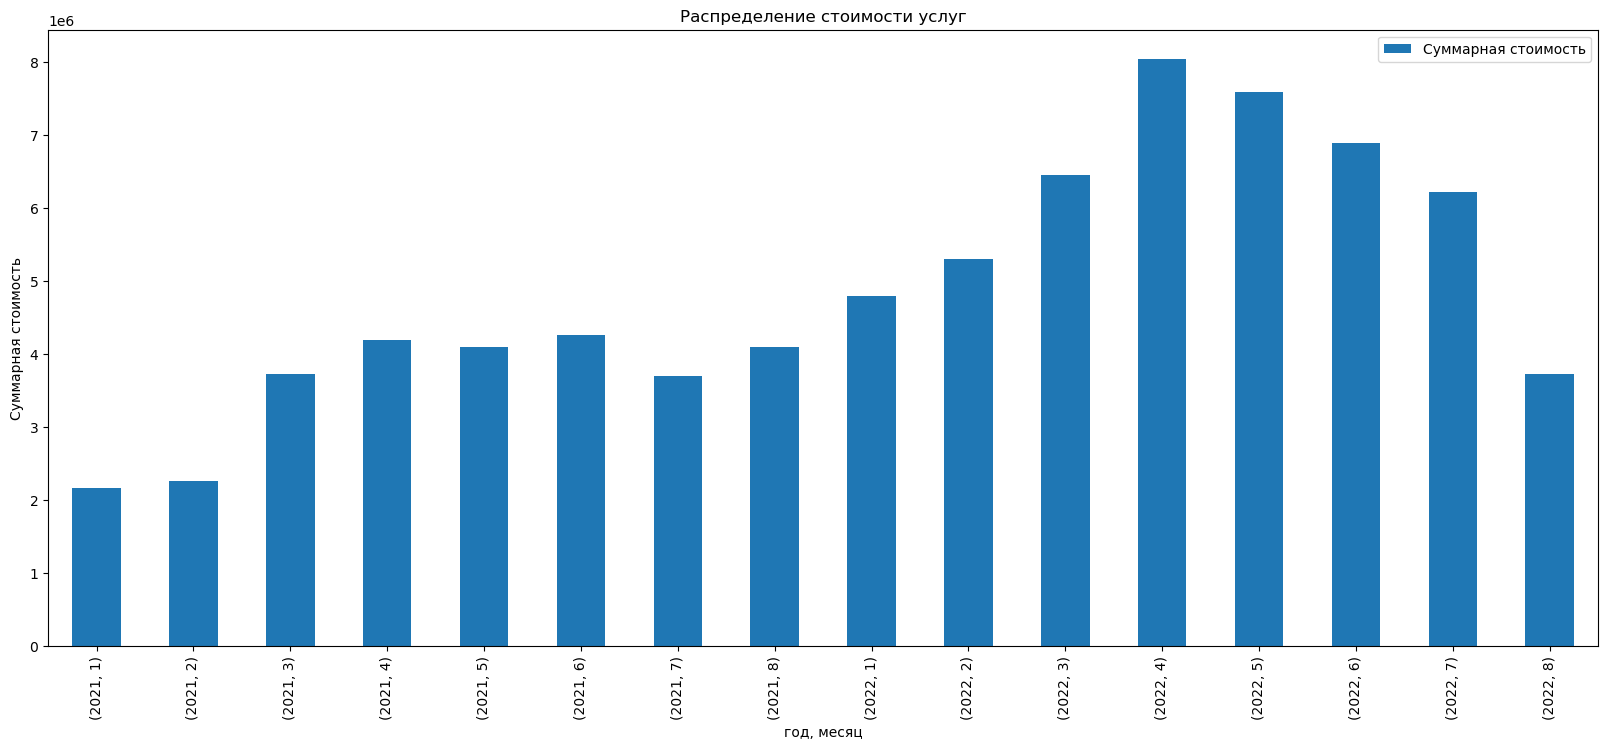

In [155]:
pivot.plot(y = 'service_amount', kind='bar', figsize=(20, 8), label='Суммарная стоимость')
plt.title("Распределение стоимости услуг")
plt.xlabel("год, месяц")
plt.ylabel("Суммарная стоимость")
plt.xticks(rotation=90)
plt.show()

In [156]:
pivot = df.pivot_table(index=['year', 'month'], values=['service_number'], aggfunc='sum')
display(pivot)

service_number
year month                
2021 1                1999
     2                2067
     3                3626
     4                3847
     5                3765
     6                3831
     7                3511
     8                3735
2022 1                4228
     2                4686
     3                5685
     4                6840
     5                6498
     6                5861
     7                4914
     8                3089

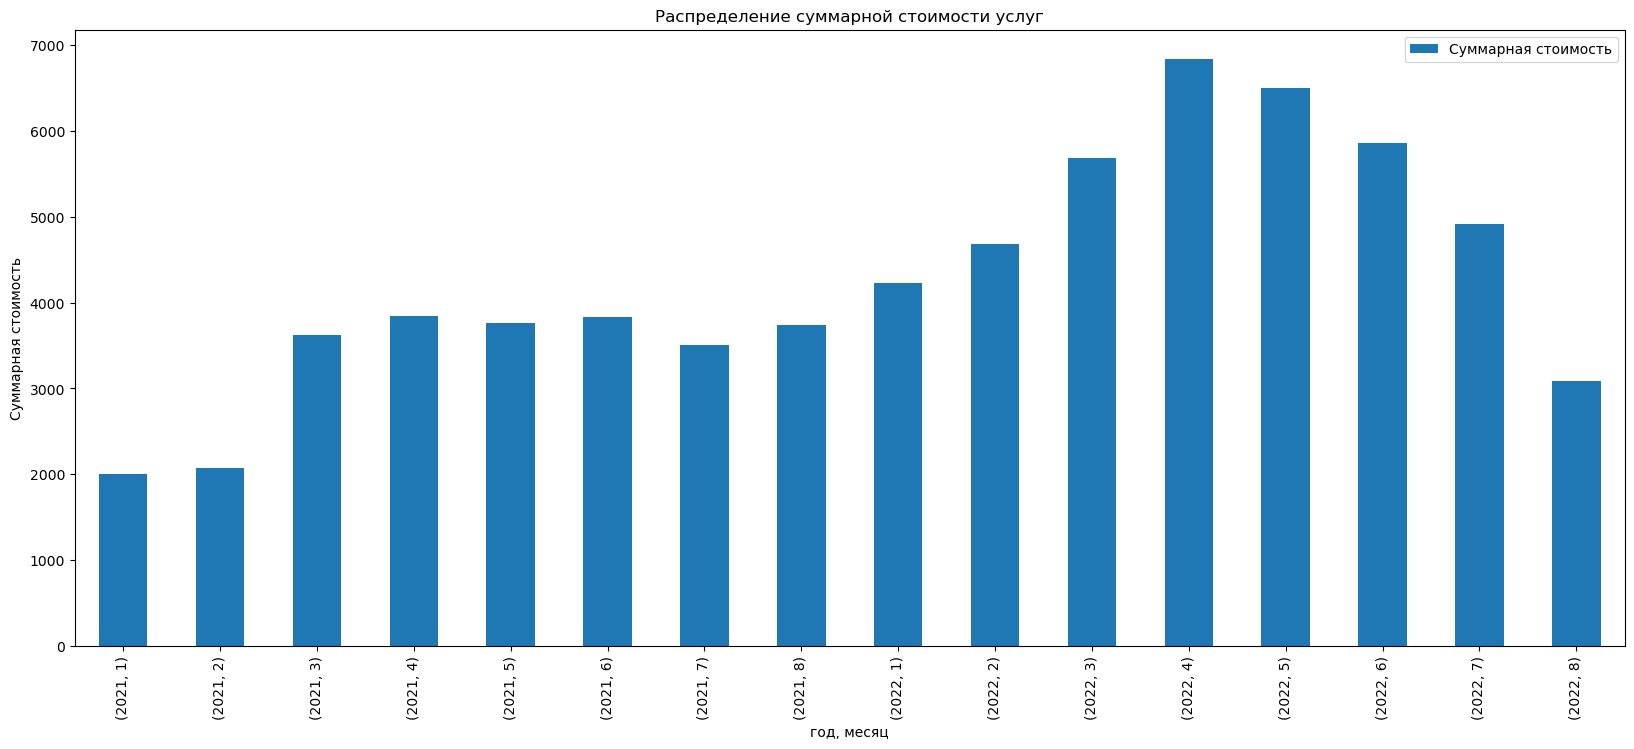

In [157]:
pivot.plot(y = 'service_number', kind='bar', figsize=(20, 8), label='Суммарная стоимость')
plt.title("Распределение суммарной стоимости услуг")
plt.xlabel("год, месяц")
plt.ylabel("Суммарная стоимость")
plt.xticks(rotation=90)
plt.show()

Выручка растет с начала 2022 года по апрель 2022 года за счет увеличения за счет увеличения количества процедур. Потом идет снижение как выручки так и количества процедур, видно "старые" пользователи вылечились, а новые не пришли.

In [158]:
pivot1 = df.pivot_table(index=['insured', 'year'], values=['service_amount'], aggfunc='sum')
pivot1=pivot1.query("year==2021")
#display(pivot1)
pivot2 = df.pivot_table(index=['insured', 'year'], values=['service_amount'], aggfunc='sum')
pivot2=pivot2.query("year==2022")
#display(pivot2)
merged_df = pivot1.reset_index().merge(pivot2.reset_index(), on='insured', suffixes=('_2021', '_2022'))
display(merged_df)

,insured,year_2021,service_amount_2021,year_2022,service_amount_2022
0,125094,2021,4479,2022,6380
1,142438,2021,14529,2022,8630
2,142447,2021,64737,2022,17470
3,142488,2021,44297,2022,13250
4,142530,2021,12135,2022,7820
...,...,...,...,...,...
457,680996,2021,5965,2022,24480
458,680997,2021,14937,2022,44097
459,681003,2021,2373,2022,4790
460,681007,2021,8602,2022,17450


In [159]:
merged_df['ratio']=merged_df['service_amount_2022']/merged_df['service_amount_2021']
merged_df=merged_df[['insured', 'ratio']]
merged_df=merged_df.sort_values('ratio', ascending=False)
merged_df['ratio'].describe()

count    462.000000
mean       2.385751
std        4.236204
min        0.010542
25%        0.336099
50%        0.988635
75%        2.422669
max       47.557823
Name: ratio, dtype: float64

In [160]:
merged_df=merged_df.head(20)
merged_df

,insured,ratio
456,680995,47.557823
357,634851,25.748299
90,279077,25.280112
413,652021,22.895918
452,680989,22.774725
422,662481,21.035040
420,661904,18.879871
344,634794,17.737447
446,680980,16.935408
246,544700,16.884354


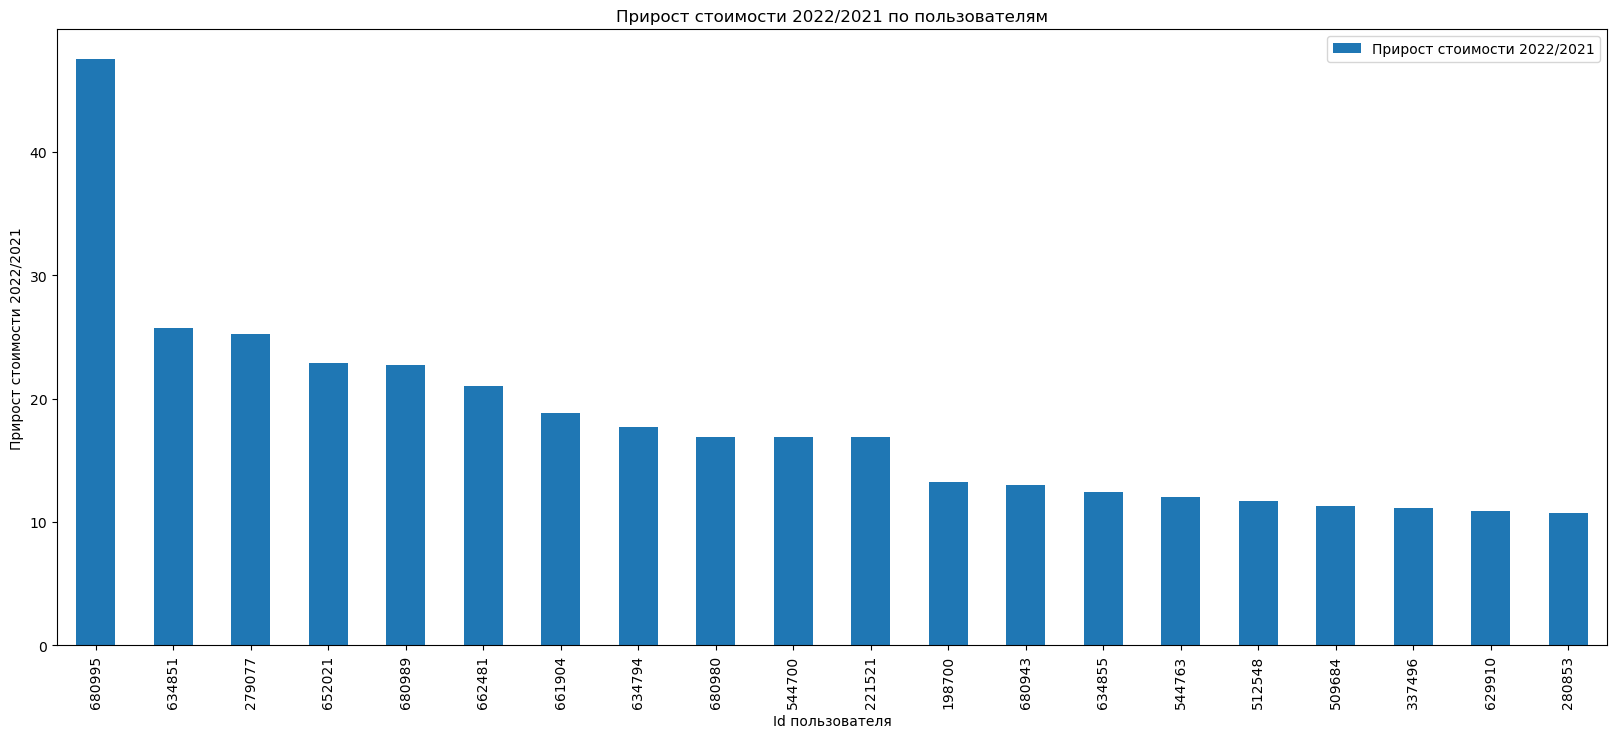

In [161]:
merged_df.plot(x = 'insured', y =  'ratio', kind='bar', figsize=(20, 8), label='Прирост стоимости 2022/2021')
plt.title("Прирост стоимости 2022/2021 по пользователям")
plt.xlabel("Id пользователя")
plt.ylabel("Прирост стоимости 2022/2021")
plt.xticks(rotation=90)
plt.show()

Прирост платы за лечение по пользователям не равномерный и всреднем составляет 2,4

In [162]:
pivot1 = df.pivot_table(index=['month', 'year'], values=['service_amount'], aggfunc='sum')
pivot1=pivot1.query("year==2021")

pivot2 = df.pivot_table(index=['month', 'year'], values=['service_amount'], aggfunc='sum')
pivot2=pivot2.query("year==2022")

merged_df = pivot1.reset_index().merge(pivot2.reset_index(), on='month', suffixes=('_2021', '_2022'))
merged_df['ratio']=merged_df['service_amount_2022']/merged_df['service_amount_2021']
merged_df=merged_df[['month', 'ratio']]
merged_df=merged_df.sort_values('month', ascending=True)
merged_df['ratio'].describe()

count    8.000000
mean     1.785085
std      0.436975
min      0.908682
25%      1.666819
50%      1.794166
75%      1.992111
max      2.350331
Name: ratio, dtype: float64

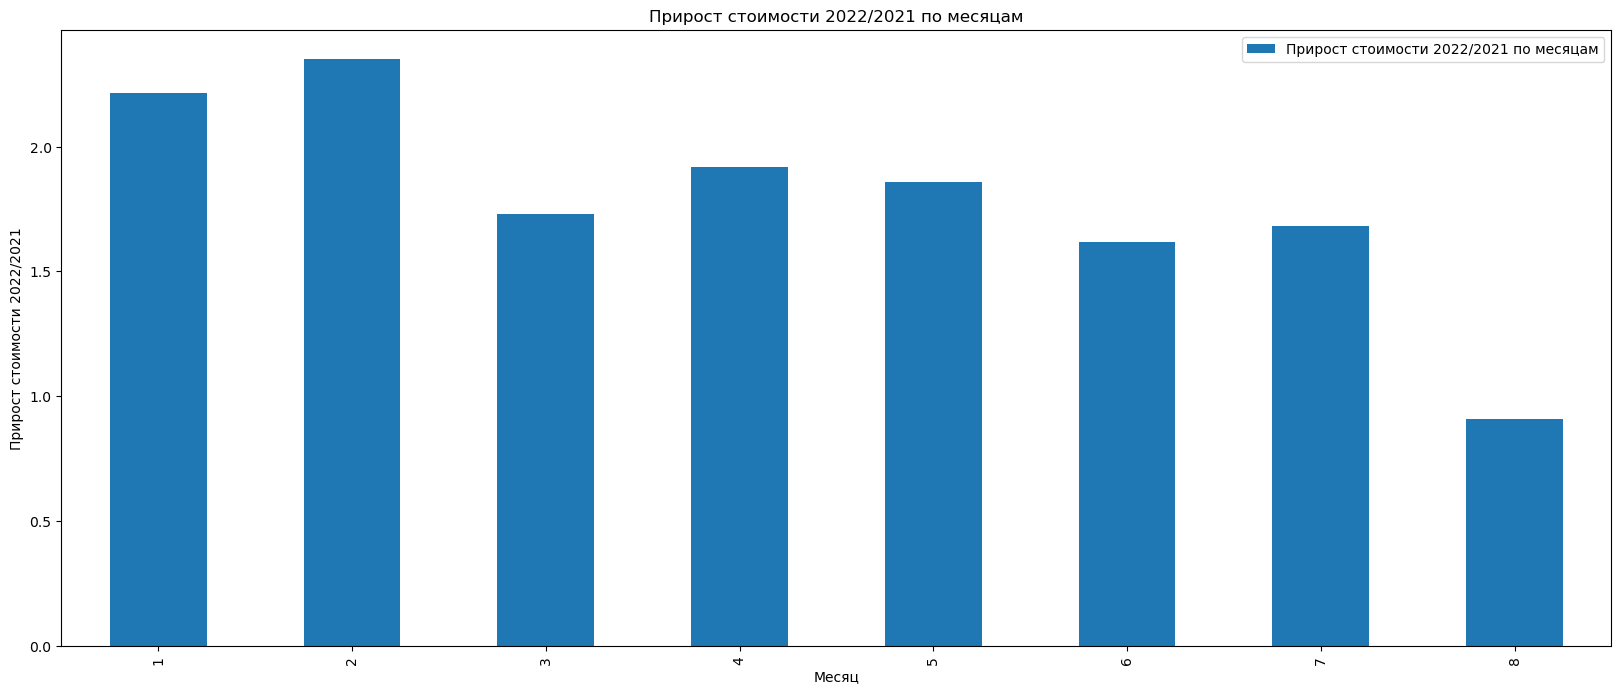

In [163]:
merged_df=merged_df.head(20)
merged_df.plot(x = 'month', y =  'ratio', kind='bar', figsize=(20, 8), label='Прирост стоимости 2022/2021 по месяцам')
plt.title("Прирост стоимости 2022/2021 по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Прирост стоимости 2022/2021")
plt.xticks(rotation=90)
plt.show()

По месяцам прирост выручки также падает.
В январе и феврале был рост выручки более чем в два раза, далее произошло снежение выручки в 2022 году по отношению к 2021 году.

Промежуточные выводы:
    Выручка растет с начала 2022 года по апрель 2022 года за счет увеличения за счет увеличения количества процедур. Потом идет снижение как выручки так и количества процедур, видно "старые" пользователи вылечились, а новые не пришли.
    Прирост платы за лечение по годам по пользователям не равномерный и всреднем составляет 2,4.
    По месяцам прирост выручки также падает. В январе и феврале был рост выручки более чем в два раза, далее произошло снежение выручки в 2022 году по отношению к 2021 году.

===================================================================================================

# Анализ разницы в стоимости услуг в год

In [164]:
pivot1 = df.pivot_table(index=['name_group', 'year'], values=['service_amount'], aggfunc='sum')
pivot1=pivot1.query("year==2021")
pivot2 = df.pivot_table(index=['name_group', 'year'], values=['service_amount'], aggfunc='sum')
pivot2=pivot2.query("year==2022")
merged_df = pivot1.merge(pivot2, on=['name_group'], suffixes=('_2021', '_2022')).reset_index()
display(merged_df)

,name_group,service_amount_2021,service_amount_2022
0,Исследование,14344735,23878711
1,Массаж и процедуры,2188357,3319140
2,Операции,1257720,1854398
3,прием специалиста,10601062,19846130
4,прочее,57158,62780


In [165]:
merged_df['ratio']=merged_df['service_amount_2022']/merged_df['service_amount_2021']
merged_df=merged_df[['name_group', 'ratio']]
merged_df=merged_df.sort_values('ratio', ascending=False)
merged_df['ratio'].describe()

count    5.000000
mean     1.525244
std      0.284876
min      1.098359
25%      1.474412
50%      1.516727
75%      1.664632
max      1.872089
Name: ratio, dtype: float64

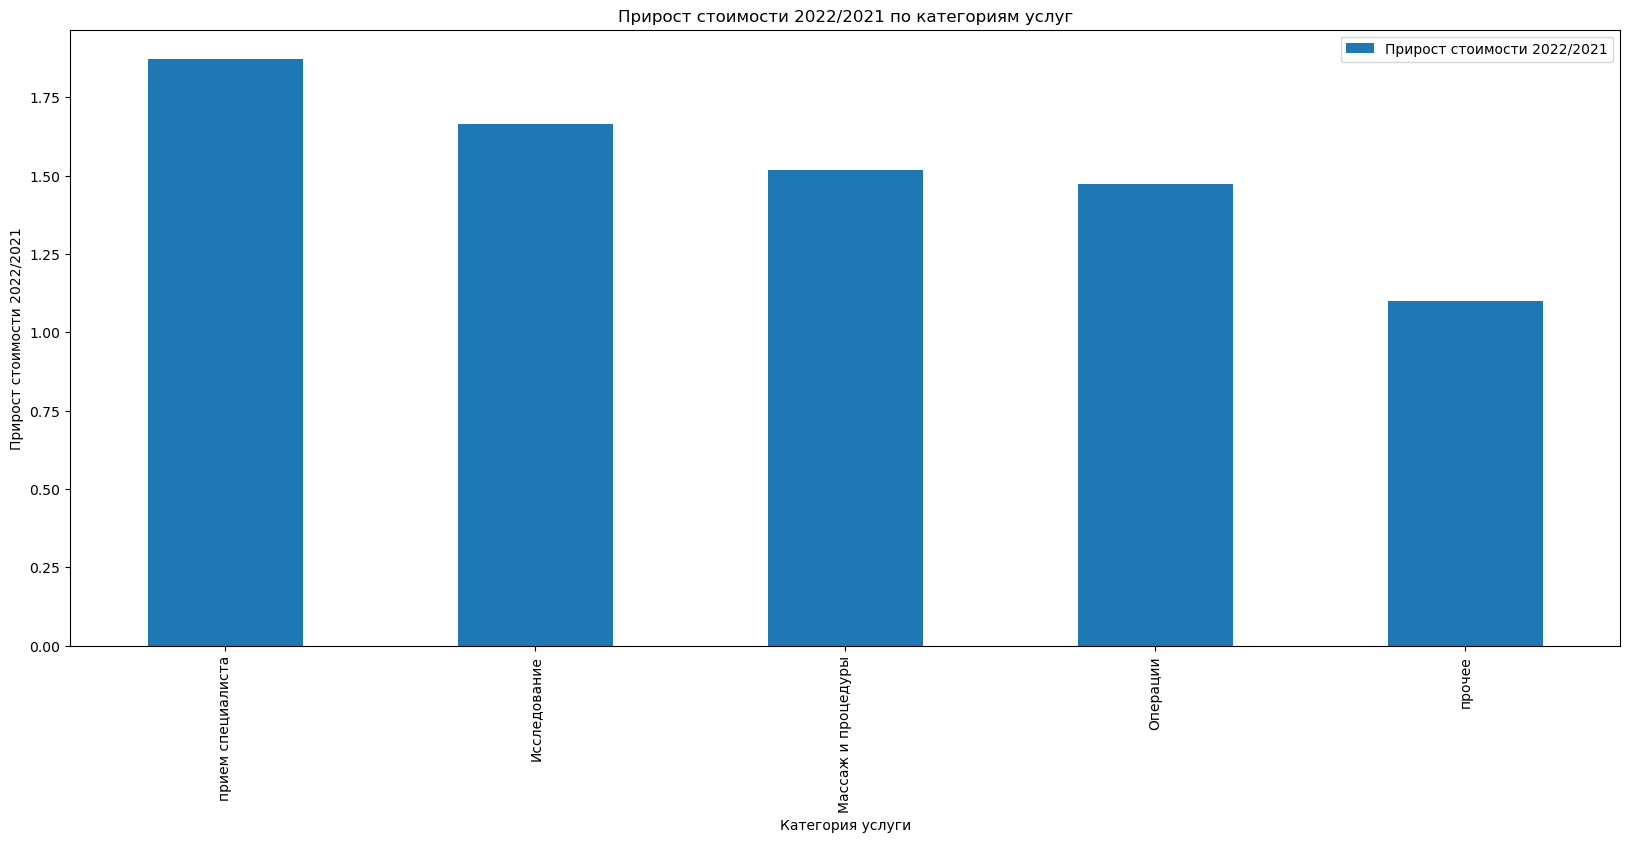

In [166]:
merged_df=merged_df.head(20)
merged_df.plot(x = 'name_group', y =  'ratio', kind='bar', figsize=(20, 8), label='Прирост стоимости 2022/2021')
plt.title("Прирост стоимости 2022/2021 по категориям услуг")
plt.xlabel("Категория услуги")
plt.ylabel("Прирост стоимости 2022/2021")
plt.xticks(rotation=90)
plt.show()

Рост в 2022 показали все категории услуг кроме группы "прочее".

Промежуточный вывод:
    Рост в 2022 показали все категории услуг кроме группы "прочее". Наибольший рост был в категории "прием специалиста".

# Общие выводы

1. В категории "исследования" особой разницы в цене услуг не наблюдается. В категории "массаж и процедуры" имеется рост цен начиная с мая 2021 года, заканчивая апрелем 2022 года. В это время часто делались дорогие процедуры "сеанс_sis_терапии_длинный_цикл" и "втэс_внутритканевая_электростимуляция". С января по март 2022 года услуга 'сеанс_sis_терапии_длинный_цикл1зона' имела более высокую цену. 'втэс_внутритканевая_электростимуляция1сеанс_на_любую_область' делал один человек один раз. Что касается операций, то в категории "высокая" цена имеются неоднороднати по месяцам. Топ 3 самых дорогих операций: тотальная_внутривенная_анестезия делалась в июне 2021 года. хирургическое_удаление_доброкачественной_опухоли_кожи делалась в августе и марте 2022 года и в марте 2021 года, стоимость данной операции повышалась дважды в 2021 и 2022 годах;  вскрытие_панариция делалась в августе и апреле 2022 и в апреле 2021. У "приема специалиста" интересная картина, "дорогих" приемов в 2021 году было больше чем в 2022 году. В 2021 году очевидное влияние на структуру приемов специалистов произвели отголоски КОВИД-19. Первое место по стоимости заняли "приемы врачей на дому". В 2022 году же на первое место по стоимости вышли "приемы_врача_эндокринолога__руководителя_направления". В категории "прочее" все стабильно кроме апреля 2021 года, когда появляется дорогостоящая позиция - подбор_срар_терапии.
2. Во всех возрастных категориях видно то, что стоимость дорогого лечения в 2021 году выше чем в 2022 году. В 2021 году страна начала выход из ограничений по ковид, возможно люди начали проводить плановые операции и обследования, плюс в 2022 началась СВО и экономическая ситуация у людей ухудшилась.
3. Координально большой разницы между полами в тратах на лечение нет. Видно не большое повышение в стоимости лечения мужчин начиная с 3 месяца 2022 года, видно из-за СВО. Если смотреть суммарный прайс, то видно что и мужчины и женщины потратили в 2022 больше средств чем в 2021.
4. Выручка растет с начала 2022 года по апрель 2022 года за счет увеличения за счет увеличения количества процедур. Потом идет снижение как выручки так и количества процедур, видно "старые" пользователи вылечились, а новые не пришли. Прирост платы за лечение по годам по пользователям не равномерный и всреднем составляет 2,4. По месяцам прирост выручки также падает. В январе и феврале был рост выручки более чем в два раза, далее произошло снежение выручки в 2022 году по отношению к 2021 году.
5. Рост в 2022 показали все категории услуг кроме группы "прочее". Наибольший рост был в категории "прием специалиста".